# Описание проекта
  Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
  Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  
  В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statistics as stat
import seaborn as sns
from scipy import stats as st

import warnings
warnings.simplefilter("ignore")

Откроем файл и выведем первые 5 (пять) строк датасета.

In [2]:
data = pd.read_csv('....csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Выведем основную информацию о датасете** с помощью метода info().

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


**Вывод по пунтку 1**

Из общей информации следует, что **всего в датасете содержится 16 715 строк**. При этом, **в некоторых столбцах часть данных отстутствует** (характер и количественные показатели пропущенных данных будем рассматривать на следующем этапе (предобработка данных)).

### Предобработка данных

**Заменим названия столбцов (приведём к нижнему регистру)**, сразу проверим, как прошла замена.

In [4]:
data.rename(columns=lambda x: x.replace(x, x.lower()), inplace=True)
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Для преобразования данных в нужные типы данных, а также для обработки пропущенных значений создадим соответствующую таблицу.**

In [5]:
data_general_info = pd.DataFrame({'Количество ненулевых значений':data.count(),
                                  'Количество пропущенных значений в столбце':data.isna().sum(),
                                  'Доля пропущенных значений в столбце':round(data.isna().mean()*100, 2),
                                  'Тип данных в столбце':data.dtypes},
                                 index=data.columns,
                                 columns=['Количество ненулевых значений','Количество пропущенных значений в столбце',\
                                         'Доля пропущенных значений в столбце', 'Тип данных в столбце'])

#data_general_info.index.names = ['Наименование столбца']
data_general_info

,Количество ненулевых значений,Количество пропущенных значений в столбце,Доля пропущенных значений в столбце,Тип данных в столбце
name,16713,2,0.01,object
platform,16715,0,0.00,object
year_of_release,16446,269,1.61,float64
genre,16713,2,0.01,object
na_sales,16715,0,0.00,float64
eu_sales,16715,0,0.00,float64
jp_sales,16715,0,0.00,float64
other_sales,16715,0,0.00,float64
critic_score,8137,8578,51.32,float64
user_score,10014,6701,40.09,object


Рассмотрим каждый столбец в отдельности.
1. **Название игры (столбец "name")**, тип данных соответствует смысловому содержанию столбца, при этом 2 (два) значения пропущены. В дальнейшем при проведении анализа данных название игры не нужно, но **в столбце "genre" (жанр игры) также пропущены 2 (два) значения**. Поэтому выведем строки, в которых отсутствует информация о наименовании игр.

In [6]:
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Как видно, **в 2 (двух) строках отсутствуют сведения и о названии игры, и о жанре игры**. Причиной таких пропусков, скорее всего, стало отсутствие информации (возможно, человеческий фактор при сохранении сведений) в связи с тем, что массив данных сформирован в 2016 году через 23 года после года выпуска рассматриваемых игр (1993 год). 

Так как рассматриваемые данные, а именно жанр игр, необходимы для дальнейшего исследования, а также учитывая, что:
- доля таких пропусков не составляет и сотой доли процента от общего количество записей в столбце;
- ничем заполнить пропуски не представляется возможным,

**целесообразно удалить рассматриваемые строки**.

In [7]:
count_rows_before = data.shape[0] #зафиксируемой начальное количество строк датасета

def result_drop_before(column, text, count_rows_before):
    """Функция отображает количественные характеристики
    пропущенных значений.
    """    
    print('Общее количество строк датафрейма: ', count_rows_before)
    print('Количество пропущенных значений в столбце', text, ': ', column.isna().sum())
    print('Доля пропущенных значений в столбце', text, ': ', round(column.isna().mean(), 2),\
          '% от общего массива данных')
    
def result_drop_after(dataset, column, count_rows_before):
    """Функция отображает количественные характеристики
    пропущенных значений до и после удаления пропусков,
    и удаляет такие строки.
    """
    print('Общее количество строк датафрейма до удаления: ', count_rows_before)
    dataset.dropna(subset = column, inplace = True)
    print('Общее количество строк датафрейма после удаления: ', dataset.shape[0])
    count_rows_after = dataset.shape[0]
    print('Всего удалено', count_rows_before - count_rows_after, 'строк или ', \
          '{0:,.2f}'.format((count_rows_before - count_rows_after)/count_rows_before).replace(',', ' '),\
          '% от общего массива данных')

In [8]:
result_drop_before(data['name'], 'название игры', count_rows_before)
print('-' * 60)
result_drop_after(data, ['name'], count_rows_before)

Общее количество строк датафрейма:  16715
Количество пропущенных значений в столбце название игры :  2
Доля пропущенных значений в столбце название игры :  0.0 % от общего массива данных
------------------------------------------------------------
Общее количество строк датафрейма до удаления:  16715
Общее количество строк датафрейма после удаления:  16713
Всего удалено 2 строк или  0.00 % от общего массива данных


Перейдём к столбцу год выпуска ("year_of_release").

2. В столбце **год выпуска ("year_of_release")** пропущено 1,61% от общего массива данных, а также тип данных - вещественные числа (float64). Представляется **целесообразным удаление строк с такими пропусками** (заполнить пропуски иными значениями не представляется возможным), а также **изменение типа данных столбца на целочисленный** (integer).

Стоит отметить, что рассматриваемые пропуски, скорее всего, возникли из-за того, что массив данных об играх сформирован более чем за 20 (двадцать) лет (за это время, произошло кардинальное изменение информационных технологий, связанное с их ростом и повсеместным распростанением, а также подходы к хранению данных). 

In [9]:
result_drop_before(data['year_of_release'], 'год выпуска', count_rows_before)
print('-' * 60)
result_drop_after(data, ['year_of_release'], count_rows_before)

Общее количество строк датафрейма:  16715
Количество пропущенных значений в столбце год выпуска :  269
Доля пропущенных значений в столбце год выпуска :  0.02 % от общего массива данных
------------------------------------------------------------
Общее количество строк датафрейма до удаления:  16715
Общее количество строк датафрейма после удаления:  16444
Всего удалено 271 строк или  0.02 % от общего массива данных


In [10]:
data['year_of_release'] = data['year_of_release'].astype(int)

In [11]:
data['year_of_release'].sort_values().unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016])

Перейдём к столбцу "critic_score" (оценка критиков (максимум 100)).

3. В столбце **оценка критиков ("critic_score")** пропущена более половины значений от всего массива даннных (51,32%). Удаление такого объёма данных недопустимо, заполнить пропуски иными значениями также не представляется возможным (оценки критиков не зависят ни от жанра игры, ни от объёма продаж), иначе получим синтетические данные, искажающие как статистики, так и выводы по результатам исследования.

Пропуски, вероятнее всего, связаны с тем, что не всем игры оцениваются критиками.

Выведем уникальные значения рассматриваемого столбца для определения необходимости изменить тип данных с вещественного (float) на целочисленный (int).

In [12]:
data['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

Как видно, **оценки критиков принимают целые значения от 0 до 100**, следовательно, **чтобы изменить тип данных на целочисленный (int), необходимо заменить пропуски на неправдоподобное значение**, которое при дальнейшем анализе данных будем отсекать.

In [13]:
data['critic_score'] = data['critic_score'].fillna(77777)

Теперь переведём тип данных столбца оценка критиков ("critic_score") из вещественного (float) в целочисленный (int).

In [14]:
data['critic_score'] = data['critic_score'].astype(int)

Перейдём к столбцу "user_score" (оценка пользователей (максимум 10)).

4. В столбце **оценка пользователей ("user_score")** пропущены 40% от всего массива даннных. Удаление такого объёма данных недопустимо, заполнить пропуски иными значениями также не представляется возможным (оценки пользователей субъективны не зависят ни от жанра игры, ни от объёма продаж), иначе получим синтетические данные, искажающие как статистики, так и выводы по результатам исследования.

Вероятнее всего, пропуски в рассматриваемом столбце связаны с тем, что не у всех игр достаточное количество оценок от пользователей, чтобы сформировать общую пользовательскую оценку.

Выведем уникальные значения рассматриваемого столбца для определения необходимости изменить тип данных с object на вещественный (float) или целочисленный (int).

In [15]:
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Как видно из данных **для значений столбца подходит вещественный тип данных** (float). Перед тем, как изменить тип данных рассматриваемого столбца, **необходимо рассмотреть такое значение, как "tbd"**. TBD - аббревиатура от английского To Be Determined (будет определено), таким образом, оценка пользователей в отношении игр, у которых указано "tbd", не определена.

В целях проведения дальнейшего анализа данных **заменим "tbd" на пропуски** (nan). И сразу проверим, как прошла замена.

In [16]:
data['user_score'] = data['user_score'].replace('tbd', None)

In [17]:
print('Количество значений "tbd" в столбце оценка пользователей ("user_score")',\
      data.loc[data['user_score'] == 'tbd']['user_score'].isna().sum())

Количество значений "tbd" в столбце оценка пользователей ("user_score") 0


Теперь изменим тип данных в столбце оценка пользователей ("user_score") на вещественный.

In [18]:
data['user_score'] = data['user_score'].astype(float)

Теперь перейдём к столбцу "rating" (рейтинг от организации ESRB).

5. В столбце **рейтинг от организации ESRB ("rating") пропущены почти 41% от всего массива даннных**. Выведем уникальные значения рассматриваемого столбца для определения возможности заполнения таких пропусков.

Пропуски в рассматриваемом столбце, скорее всего, связаны с:
- ESRB действует в США и Канаде (в датасете продажи игр, не только в Северной Америке, но и в Европе, и в Японии);
- организация основана в 1994 году (в датасете игры с 1980-х годов).

Рассмотрим уникальные значения столбца "rating" (рейтинг от организации ESRB).

In [19]:
data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

Там, где отсутствуют значения (указано nan или None), заполним словом "indefinite" (неопределённый).

In [20]:
data['rating'] = data['rating'].fillna('indefinite')
print('Количество пропущенных значений в столбце рейтинг от организации ESRB ("rating")',\
      data['rating'].isna().sum())

Количество пропущенных значений в столбце рейтинг от организации ESRB ("rating") 0


**Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.**

In [21]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,77777,NaN,indefinite,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,77777,NaN,indefinite,31.38


**Вывод по пункту 2**

1. **Заменены названия столбцов** (приведены к нижнему регистру).

2. **Удалены 271 строка (или 1,6% от общего массива данных) с пропущенными значениями** (в 2 (двух) строках отсутствовали сведения и о названии игры, и о жанре игры, в 269 строках отсутствовал год выпуска игр).

3. **Изменены типы данных в столбцах**:
- **год выпуска ("year_of_release")** - изменение типа данных столбца с вещественного (float) на целочисленный (integer);
- **оценка критиков ("critic_score")** - изменение типа данных столбца с вещественного (float) на целочисленный (int) (при этом, пропуски заменены на неправдоподобное значение, которое при дальнейшем анализе данных не будет учитываться);
- **оценка пользователей ("user_score")** - изменение типа данных столбца с object на вещественный (float) (при этом, аббревиатура "tbd" заменена на пропуски).

4. **В столбце рейтинг от организации ESRB ("rating") пропуски заполнены словом "indefinite" (неопределённый)**.

5. **Посчитаны и записаны в отдельный столбец суммарные продажи во всех регионах**.

### Исследовательский анализ данных

#### Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [22]:
table_count_games = data.pivot_table(index='year_of_release',
                 values='name',
                 aggfunc='count')
table_count_games.index.names = ['Год выпуска']
table_count_games.columns = ['Количество игр']

table_count_games.sort_values(by='Количество игр', ascending=False).head(10)

,Количество игр
Год выпуска,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775


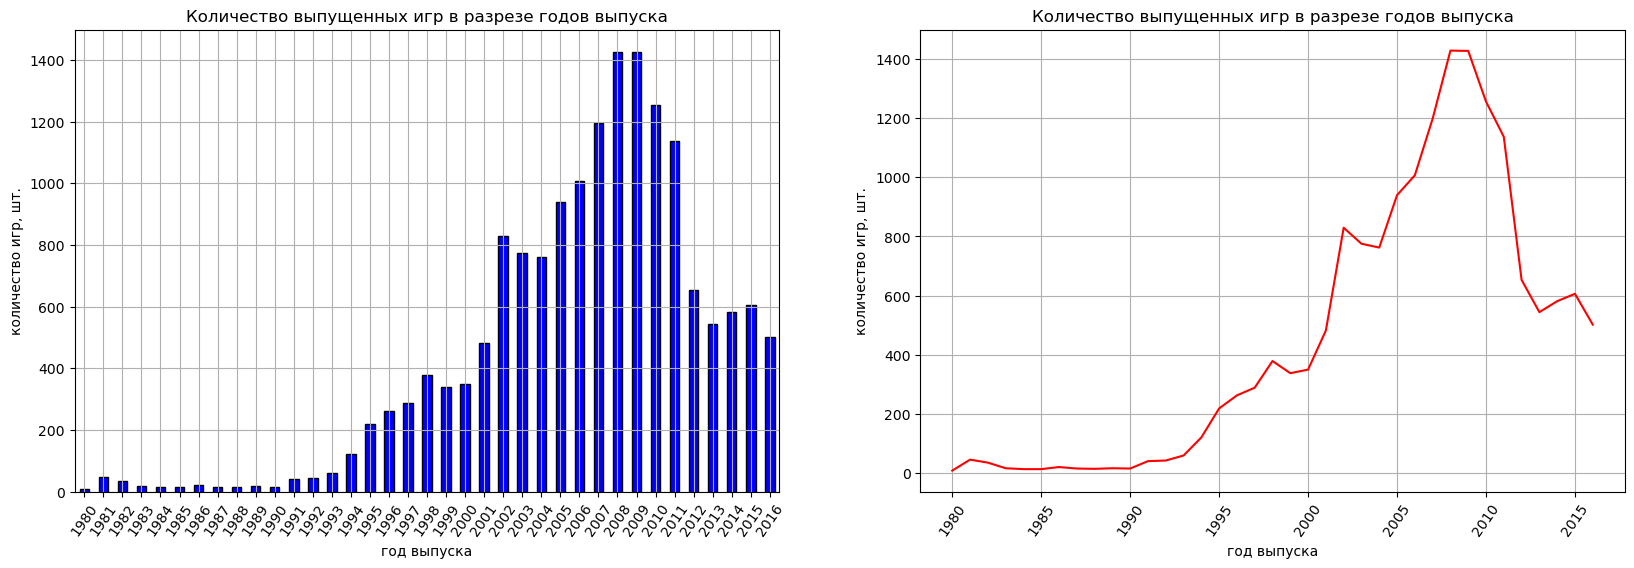

In [23]:
fig = plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
data.groupby('year_of_release')['year_of_release'].agg('count').plot(kind='bar', color='blue', grid=True, edgecolor='k')
plt.title('Количество выпущенных игр в разрезе годов выпуска')
plt.xlabel('год выпуска')
plt.ylabel('количество игр, шт.')
plt.xticks(rotation=55)

plt.subplot(1, 2, 2)
data.groupby('year_of_release')['year_of_release'].agg('count').plot(kind='line', color='red', grid=True)
plt.title('Количество выпущенных игр в разрезе годов выпуска')
plt.xlabel('год выпуска')
plt.xticks(rotation=55)
plt.ylabel('количество игр, шт.')

plt.show()

Данные в сводной таблице малоинформативны, на столбчатом и линейном графиках, несмотря на то, что отчётливо отражён рост количества выпущенных игр в разрезе годов (что логично, учитывая развитие информационных технологий, повсеместное распростанение стационарных компьютеров, ноутбуков, игровых приставок), также **затруднительно оценить данные за какой период наиболее подходят для дальнейшего анализа**. Поэтому **представляется целесообразным проведение категоризации количества игр в разрезе пятилетных периодов**.

In [24]:
def category_years(column):
    """Функция считает количество игр
    в разрезе пятилетних периодов"""
    if (column >= 1980)&(column < 1985):
        return '1980-1984'
    elif (column >= 1985)&(column < 1990):
        return '1985-1989'
    elif (column >= 1990)&(column < 1995):
        return '1990-1995'
    elif (column >= 1995)&(column < 2000):
        return '1995-1999'
    elif (column >= 2000)&(column < 2005):
        return '2000-2004'
    elif (column >= 2005)&(column < 2010):
        return '2005-2009'
    elif (column >= 2010)&(column <= 2016):
        return '2010-2016'

In [25]:
data['type_years'] = data['year_of_release'].apply(category_years)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,type_years
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54,2005-2009
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,77777,NaN,indefinite,40.24,1985-1989
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52,2005-2009
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77,2005-2009
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,77777,NaN,indefinite,31.38,1995-1999


Теперь **построим стобчатый и линейный графики** на основании данных о количестве игр **в разрезе пятилетных периодов**.

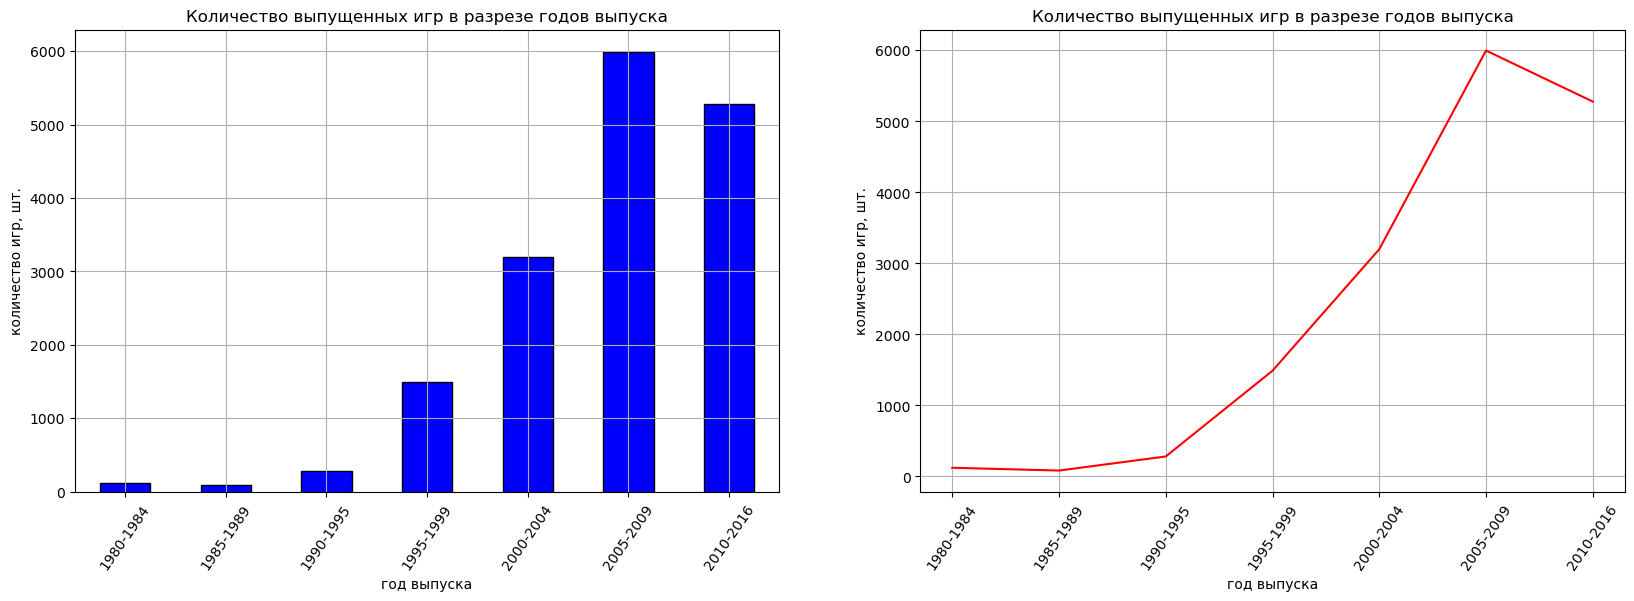

In [26]:
fig = plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
data.groupby('type_years')['type_years'].agg('count').plot(kind='bar', color='blue', grid=True, edgecolor='k')
plt.title('Количество выпущенных игр в разрезе годов выпуска')
plt.xlabel('год выпуска')
plt.ylabel('количество игр, шт.')
plt.xticks(rotation=55)

plt.subplot(1, 2, 2)
data.groupby('type_years')['type_years'].agg('count').plot(kind='line', color='red', grid=True)
plt.title('Количество выпущенных игр в разрезе годов выпуска')
plt.xlabel('год выпуска')
plt.xticks(rotation=55)
plt.ylabel('количество игр, шт.')

plt.show()

Теперь видно, что **для дальнейшего исследования**, а также для анализа данных более всего, исходя из количества выпущенных игр, **больше всего подходит один из периодов с 2005 по 2016 годы**.

**Вывод по пункту 3.1**

Исходя из проведённого анализа данных, **для проведения дальнейшего исследования важны данные за период с 2005 по 2006 годы**.

#### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Сначала построим сводную таблицу продаж по платформам, чтобы выделить платформы с наибольшими суммарными продажами. Также построим столбчатый график для большей наглядности.

In [27]:
table_sales_platform = data.pivot_table(index='platform',
                 values='total_sales',
                 aggfunc='sum')

table_sales_platform['ratio'] = round(table_sales_platform['total_sales'] / table_sales_platform['total_sales']\
                                      .sum()*100, 2)
table_sales_platform.sort_values(by='total_sales', ascending=False).head(10)

,total_sales,ratio
platform,,
PS2,1233.56,13.99
X360,961.24,10.91
PS3,931.34,10.57
Wii,891.18,10.11
DS,802.78,9.11
PS,727.58,8.25
PS4,314.14,3.56
GBA,312.88,3.55
PSP,289.53,3.28


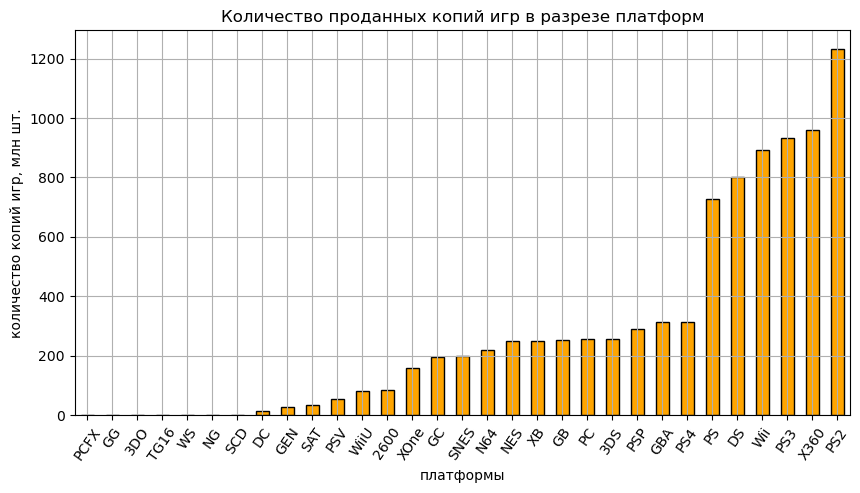

In [28]:
data.groupby('platform')['total_sales'].agg('sum').sort_values()\
.plot(kind='bar', figsize=(10,5), color='orange', grid=True, edgecolor='k')
plt.title('Количество проданных копий игр в разрезе платформ')
plt.xlabel('платформы')
plt.ylabel('количество копий игр, млн шт.')
plt.xticks(rotation=55)
plt.show()

In [29]:
print('Количество проданных копий игр 6 (шести) платформ: ',\
      round(table_sales_platform.sort_values(by='total_sales', ascending=False)[:6]['total_sales'].sum(), 2),\
     'миллионов копий')
print('Доля проданных копий игр 6 (шести) платформ от количества всех продаж: ',\
      round(table_sales_platform.sort_values(by='total_sales', ascending=False)[:6]['ratio'].sum(), 2),
     '%')

Количество проданных копий игр 6 (шести) платформ:  5547.68 миллионов копий
Доля проданных копий игр 6 (шести) платформ от количества всех продаж:  62.94 %


Как видно из графика, **наибольшее число проданных копий игр почти 63% от всех продаж приходится на 6 (шесть) платформ**: PS2, X360, Wii, PS3, DS, PS. Их и возьмём для дальнейшего исследования.

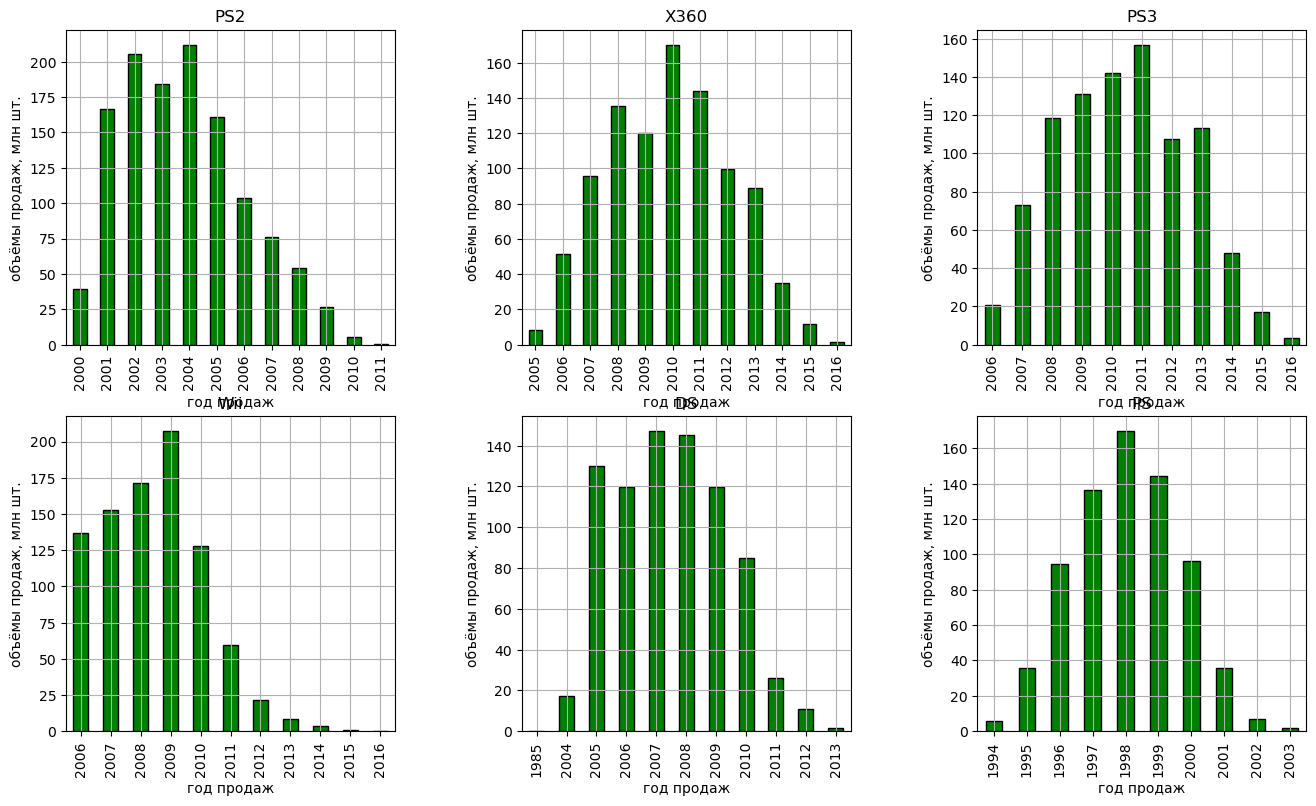

In [30]:
fig, axes = plt.subplots(2, 3)
axes = axes.ravel()
plt.tight_layout(h_pad= 1)
i = 0
list_name_big_platform = ['PS2', 'X360',  'PS3', 'Wii','DS', 'PS']

for name in list_name_big_platform:
    ax = data.loc[data['platform'] == name].groupby('year_of_release')['total_sales'].\
    agg('sum').plot(kind='bar', figsize=(14,8), color='green', grid=True, ax=axes[i],\
                    title=name, xlabel='год продаж', ylabel='объёмы продаж, млн шт.', edgecolor='k')
    i += 1

Как видно из графиков, наибольшие продажи по каждой платформе **приходятся на 4-х (четырёх) годовой срок**:
- PS2: с 2001 по 2004 годы;
- X360: с 2008 по 2011 годы;
- Wii: с 2006 по 2009 годы;
- PS3: с 2008 по 2011 годы;
- DS: с 2005 по 2008 годы;
- PS: с 1997 по 2000 годы.

Далее идёт спад объёмов продаж. Стоит отметить, что **жизненный цикл платформ составляет в среднем 10 (десять) лет**, что также видно по столбчатым графикам.

Отдельно стоит отметить, что у платформы DS (средний график во втором ряду) фигурирует 1985 год. При этом, платформа выпущена в 2004 году, то есть никаких продаж в 1985 году у рассматриваемой платформы быть не может. Выведем такие строки.


In [31]:
data.loc[(data['platform'] == 'DS')&(data['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,type_years
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,77777,NaN,indefinite,0.02,1985-1989


Очевидно, что в данной строке ошибка. Так как, на текущем этапе исследования рассматриваемые данные не оказывают существенного влияния на выводы, оставим данную строку в датасете.

**Вывод по пункту 3.2**

**Характерный срок, в течение которого появляются новые и исчезают старые платформы, составляет 10 (десять) лет**.

#### Возьмём данные за соответствующий актуальный период. Актуальный период определим в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

На основании предыдущих результатов исследования данных представляется целесообразным **для определения актуального периода исходить на основании следующих выводов**:
- в период **с 2005 по 2016 годы наблюдается значительный рост количества проданных копий игр**;
- **наибольшие продажи игр** в разрезе платформ **приходятся на срок в 4 (четыре) года**.

Кроме того, **стоит отметить следующие факторы**:
- **глобальный кризис 2008 - 2013 годов**, вызванный ипотечным кризисом в США, распространившийся на все сферы жизни, в том числе на индустрию компьютерных игр (закрывались компании и студии, производившие игры), 
- **доступность** и, как следствие, **повсеместное распространение мобильных устройств, а также игр для них** (резкий рост отмечался **с 2008-2009 годов**).

Так как целью настоящего исследования является прогнозирование продаж на 2017 год для интернет-магазина «Стримчик», то брать годы интенсивного роста популярности (с 2005 по 2009 годы), и, как следствие, значительных продаж игр для консолей, с изменением концепции и разработки, и потребительского использования игр не имеет смысла. То есть, **представляется целесообразным в качестве актуального периода взять период после 2009 года**.

Также **не стоит забывать про кризисные 2008 - 2013 года**.

Учитывая вышеизложенное, **для целей настоящего исследования представляется целесообразным взять 3-х (трёх) летний период с 2014 по 2016 годы**. В этих целях создадим отдельный датасет с соответствующими годами, с данными из которго и будем работать далее.

In [32]:
new_data = data.loc[data['year_of_release'] > 2013]
new_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,type_years
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,77777,NaN,indefinite,14.63,2010-2016
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62,2010-2016
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,77777,NaN,indefinite,11.68,2010-2016
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58,2010-2016
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,77777,NaN,indefinite,7.98,2010-2016


**Вывод по пункту 3.3**

Для целей настоящего исследования (прогноз на 2017 год) **возьмём 3-х (трёх) летний период с 2014 по 2016 годы**.

#### Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

Сначала определим платформы, лидирующие по продажам, построим график.

In [33]:
new_table_sales_platform = new_data.pivot_table(index='platform',
                 values='total_sales',
                 aggfunc='sum')

new_table_sales_platform['ratio'] = round(new_table_sales_platform['total_sales'] / \
                                          new_table_sales_platform['total_sales'].sum()*100, 2)
new_table_sales_platform.sort_values(by='total_sales', ascending=False).head(10)

,total_sales,ratio
platform,,
PS4,288.15,39.50
XOne,140.36,19.24
3DS,86.68,11.88
PS3,68.18,9.35
X360,48.22,6.61
WiiU,42.98,5.89
PC,27.05,3.71
PSV,22.40,3.07
Wii,5.07,0.70


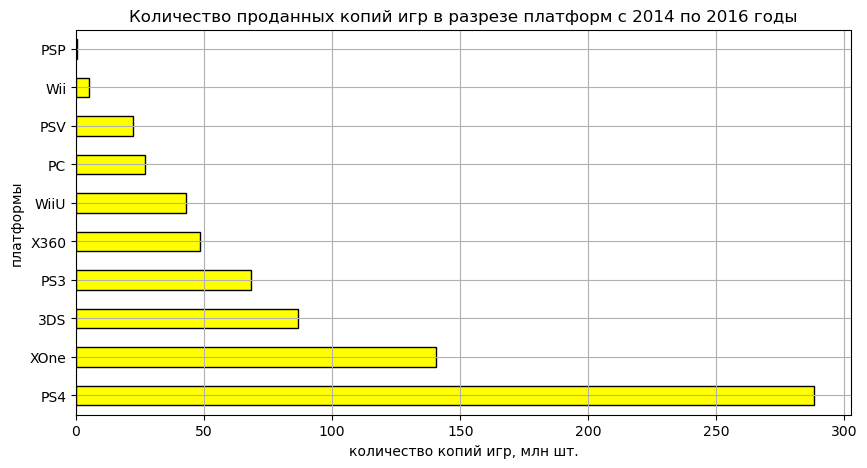

In [34]:
new_data.groupby('platform')['total_sales'].agg('sum').sort_values(ascending=False).plot(kind='barh', \
                                                                          figsize=(10,5), color='yellow',\
                                                                          grid=True, edgecolor='k')

plt.title('Количество проданных копий игр в разрезе платформ с 2014 по 2016 годы')
plt.ylabel('платформы')
plt.xlabel('количество копий игр, млн шт.')
plt.show()

Из сводной таблицы и на столбчатом графике видно, что **по продажам лидируют 3 (три) платформы: PS4, XOne, 3DS**.

Теперь посмотрим, как изменялись в актуальном периоде объёмы продаж игр рассматриваемых платформ.

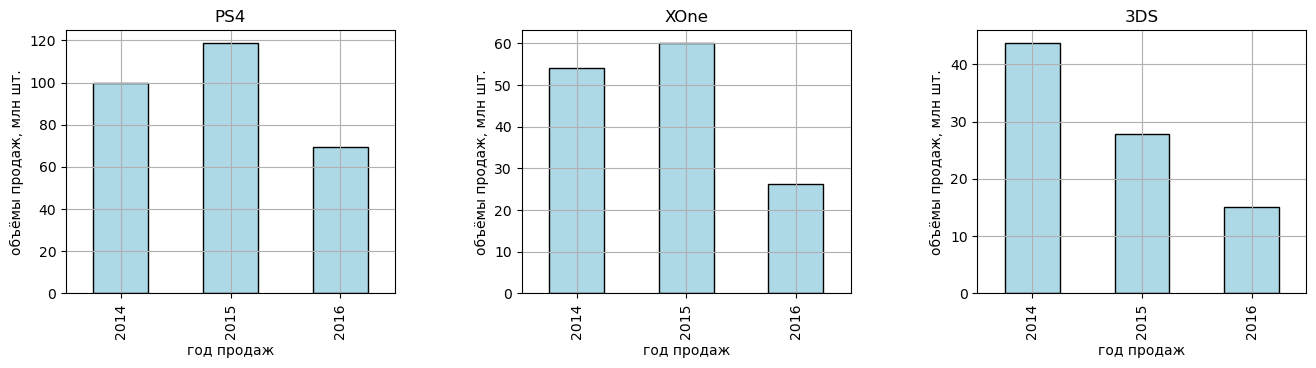

In [35]:
fig, axes = plt.subplots(1, 3)
axes = axes.ravel()
plt.tight_layout(h_pad= 1)
i = 0
list_name_big_platform = ['PS4', 'XOne', '3DS']

for name in list_name_big_platform:
    ax = new_data.loc[data['platform'] == name].groupby('year_of_release')['total_sales'].\
    agg('sum').plot(kind='bar', figsize=(14,3), color='lightblue', grid=True, ax=axes[i],\
                    title=name, xlabel='год продаж', ylabel='объёмы продаж, млн шт.', edgecolor='k')
    i += 1

Как видно из графиков, **продажи игр платформ  PS4 и XOne в 2015 выросли по сравнению с 2014 годом**, в то время, как **продажи 3DS**, наоборот, **снизились**. Что касается **2016 года**, то **продажи всех трёх платформ показали снижение**. Данное обстоятельство может быть вызвано тем, что **за 2016 год в датасете отсутствуют полные данные**.

Чтобы проверить данное предположение, построим сводную таблицу, в которой отразим объёмы продаж за каждый год актуального периода.

In [36]:
three_platform = ['PS4', 'XOne', '3DS']
new_table_sales_three_platform = new_data.query('platform in @three_platform').pivot_table(index='year_of_release',
                 values='total_sales',
                 columns='platform',                                   
                 aggfunc=['count', 'sum'])

new_table_sales_three_platform.columns = [
    'Количество продаж 3DS, шт.', 'Количество продаж PS4, шт.', 'Количество продаж XOne, шт.',\
    'Объём продаж 3DS, млн шт.', 'Объём продаж PS4, млн шт.', 'Объём продаж XOne, млн шт.']

new_table_sales_three_platform.index.names = ['Год выпуска']

new_table_sales_three_platform['Объём продаж 3DS, млн шт.'] =  \
new_table_sales_three_platform['Объём продаж 3DS, млн шт.'].round(2).astype(str)
new_table_sales_three_platform['Объём продаж PS4, млн шт.'] = \
new_table_sales_three_platform['Объём продаж PS4, млн шт.'].round(2).astype(str)
new_table_sales_three_platform['Объём продаж XOne, млн шт.'] = \
new_table_sales_three_platform['Объём продаж XOne, млн шт.'].round(2).astype(str)

colors_columns = ['Количество продаж 3DS, шт.', 'Количество продаж PS4, шт.', 'Количество продаж XOne, шт.',\
    'Объём продаж 3DS, млн шт.', 'Объём продаж PS4, млн шт.', 'Объём продаж XOne, млн шт.']

(new_table_sales_three_platform
 .style
 .highlight_max(color='lightblue', subset=colors_columns)
 .highlight_min(color='lightgrey', subset=colors_columns)
)

,"Количество продаж 3DS, шт.","Количество продаж PS4, шт.","Количество продаж XOne, шт.","Объём продаж 3DS, млн шт.","Объём продаж PS4, млн шт.","Объём продаж XOne, млн шт."
Год выпуска,,,,,,
2014,80,75,61,43.76,100.0,54.07
2015,86,137,80,27.78,118.9,60.14
2016,46,164,87,15.14,69.25,26.15


Из сводной таблицы видно, что **снизились объёмы продаж (млн копий игр), в то время, как количество таких продаж снизилось только у платформы 3DS**. Следовательно, **в 2016 году ассортимент продаваемых игр расширился (у PS4 и у XOne)**, в то время как, **количество копий игр стало продаваться меньше**.

Для полного представления построим график за актуальный период для всех платформ.

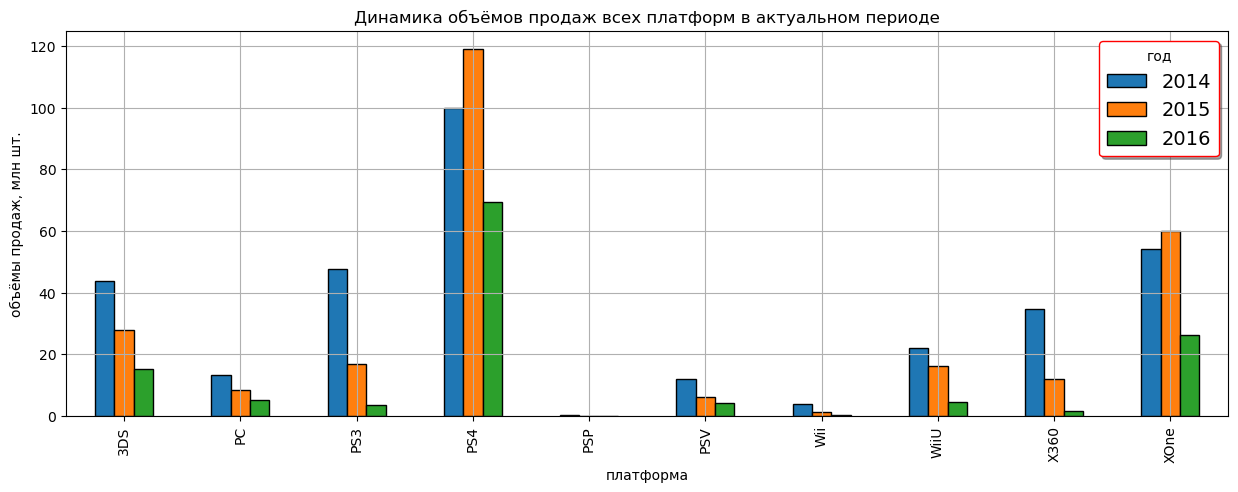

In [37]:
new_table_sales_all_platform = new_data.pivot_table(index='platform',
                                                    columns='year_of_release',
                                                    values='total_sales',
                                                    aggfunc='sum')

new_table_sales_all_platform.plot(kind='bar', figsize=(15,5), grid=True, edgecolor='k',
                                  title='Динамика объёмов продаж всех платформ в актуальном периоде',
                                  xlabel='платформа', ylabel='объёмы продаж, млн шт.')

plt.legend(fontsize=14, shadow=True, framealpha=1, edgecolor='r', title='год')
plt.show()

Скорее всего, **предположение, что данные за 2016 год неполные подтверждается**, так как **у всех платформ объёмы продаж в 2016 году по сравнению с 2015 годом снизились**.

**Вывод по пункту 3.4**  
По результатам анализа как **потенциально прибыльные платформы выбраны 3 (три): PS4, XOne, 3DS**.
**Продажи игр платформ PS4 и XOne в 2015 выросли по сравнению с 2014 годом**, в то время, как **продажи 3DS**, наоборот, **снизились**.  

Что касается 2016 года, то продажи всех трёх платформ показали снижение, причина которого в том, что **за 2016 год в датасете отсутствуют полные данные**.

####  Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

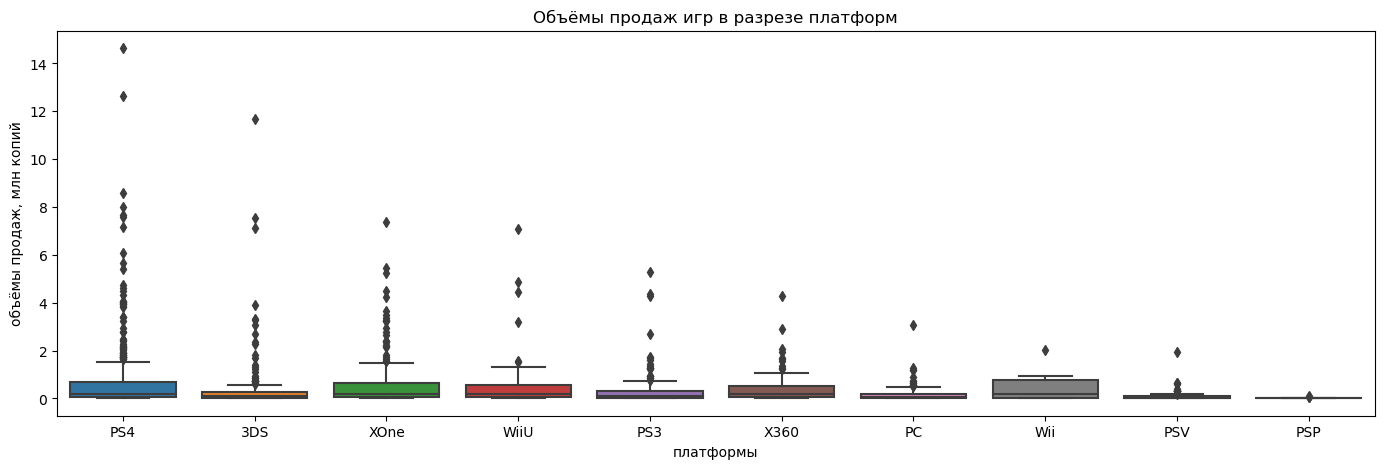

In [38]:
plt.figure(figsize=(17, 5))
sns.boxplot(data=new_data, x='platform', y='total_sales')
plt.title('Объёмы продаж игр в разрезе платформ')
plt.xlabel('платформы')
plt.ylabel('объёмы продаж, млн копий')
plt.show()

На полученных графиках также видны лидирующие по продажам платформы (PS4, XOne, 3DS). Также видно, что **больше всего выбросов у платформ PS4, XOne, 3DS**, меньше всего выбросов у платформы PSP.

**Построим график заново, ограничив его по оси ординат, чтобы лучше отображались медианы и первый квартиль (25%)**

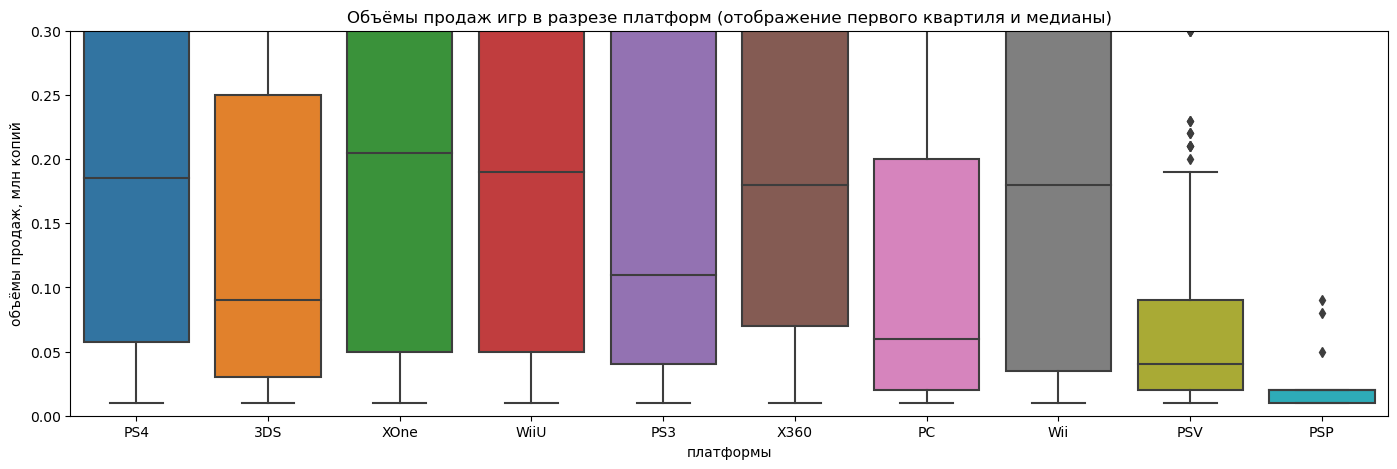

In [39]:
plt.figure(figsize=(17, 5))
ax = sns.boxplot(data=new_data, x='platform', y='total_sales')
ax.set_ylim([0,0.3])
plt.title('Объёмы продаж игр в разрезе платформ (отображение первого квартиля и медианы)')
plt.xlabel('платформы')
plt.ylabel('объёмы продаж, млн копий')
plt.show()

Из графиков следует, что:
1) в отношении медианы:
- самые большие значения у платформ: XOne, WiiU, Wii, X360 и PS4;
- самая низкие - PSP, PSV;

2) в отношении первого квартиля (25%):
- самые большие значения у платформ: X360, PS4, Wii, XOne;
- самая низкие - PSP, PSV, PS.

**Построим график заново, ограничив его по оси ординат, чтобы лучше отображался третий квартиль (75%).**

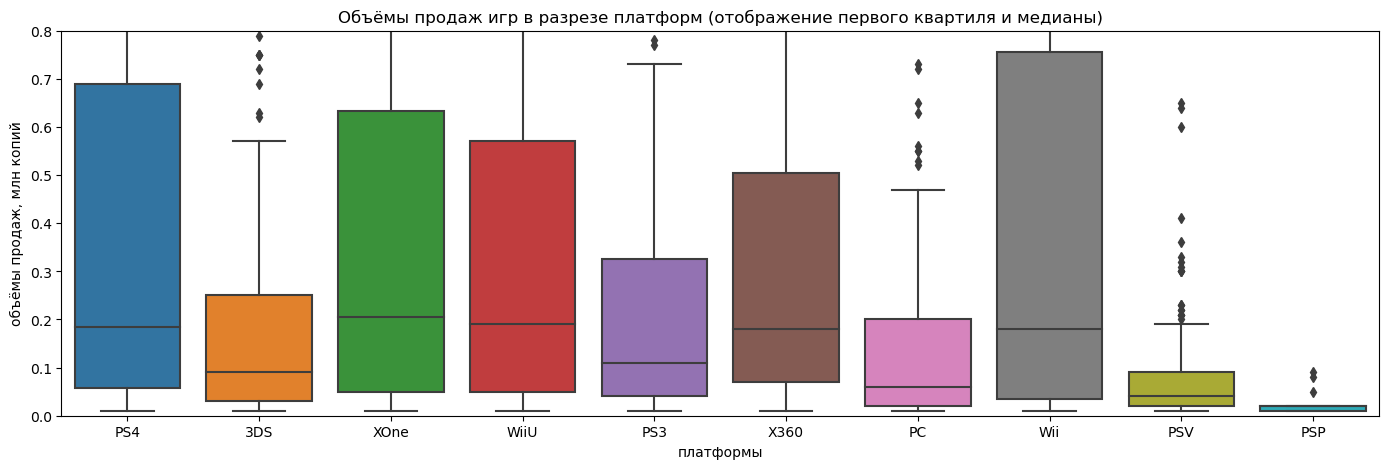

In [40]:
plt.figure(figsize=(17, 5))
ax = sns.boxplot(data=new_data, x='platform', y='total_sales')
ax.set_ylim([0,0.8])
plt.title('Объёмы продаж игр в разрезе платформ (отображение первого квартиля и медианы)')
plt.xlabel('платформы')
plt.ylabel('объёмы продаж, млн копий')
plt.show()

Из графиков следует, что в отношении третьего квартиля (75%):
- самые большие значения у платформы Wii;
- самая низкие - PSP, PSV.

Построим **сводную таблицу статистик в разрезе платформ**.

In [41]:
def quantile_25(growth_vals:pd.Series):
    '''Функция рассчитывает первый квартиль'''
    return growth_vals.quantile(.25)

def quantile_75(growth_vals:pd.Series):
    '''Функция рассчитывает третий квартиль'''
    return growth_vals.quantile(.75)

stat_table = new_data.pivot_table(index='platform',
                 values='total_sales',                                  
                 aggfunc=['min', 'max', quantile_25, 'median', quantile_75])

stat_table.columns = ['Минимальное значение', 'Максимальное значение', 'Значение первого квартиля (25%)',\
    'Значение медианы', 'Значение третьего квартиля (75%)']

stat_table.index.names = ['Платформа']
    
stat_table['Минимальное значение'] =  \
stat_table['Минимальное значение'].round(2).astype(str)
stat_table['Максимальное значение'] =  \
stat_table['Максимальное значение'].round(2).astype(str)
stat_table['Значение первого квартиля (25%)'] =  \
stat_table['Значение первого квартиля (25%)'].round(2).astype(str)
stat_table['Значение медианы'] =  \
stat_table['Значение медианы'].round(2).astype(str)
stat_table['Значение третьего квартиля (75%)'] =  \
stat_table['Значение третьего квартиля (75%)'].round(2).astype(str)

stat_table

,Минимальное значение,Максимальное значение,Значение первого квартиля (25%),Значение медианы,Значение третьего квартиля (75%)
Платформа,,,,,
3DS,0.01,11.68,0.03,0.09,0.25
PC,0.01,3.05,0.02,0.06,0.2
PS3,0.01,5.27,0.04,0.11,0.33
PS4,0.01,14.63,0.06,0.18,0.69
PSP,0.01,0.09,0.01,0.02,0.02
PSV,0.01,1.96,0.02,0.04,0.09
Wii,0.01,2.01,0.04,0.18,0.76
WiiU,0.01,7.09,0.05,0.19,0.57
X360,0.01,4.28,0.07,0.18,0.5


**Вывод по пункту 3.5**
1. В отношении **выбросов**:
- наибольшее количество выбросов у платформ PS4, XOne, 3DS;
- меньше всего выбросов у платформы PSP.
2. В отношении **медианы**:
- самые большие значения у платформ: XOne, WiiU, Wii, X360 и PS4;
- самая низкие - PSP, PSV;
3. В отношении **первого квартиля (25%)**:
- самые большие значения у платформ: X360, PS4, Wii, XOne;
- самая низкие - PSP, PSV, PS.
4. В отношении **третьего квартиля (75%)**:
- самые большие значения у платформы Wii;
- самая низкие - PSP, PSV.

####  Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

Раннее определили, что **наиболее популярной платформой** в 2014-2016 годах, исходя из объёмов продаж **является PS4**. Данные в отношении этой платформы и будем рассматривать в настоящем пункте.

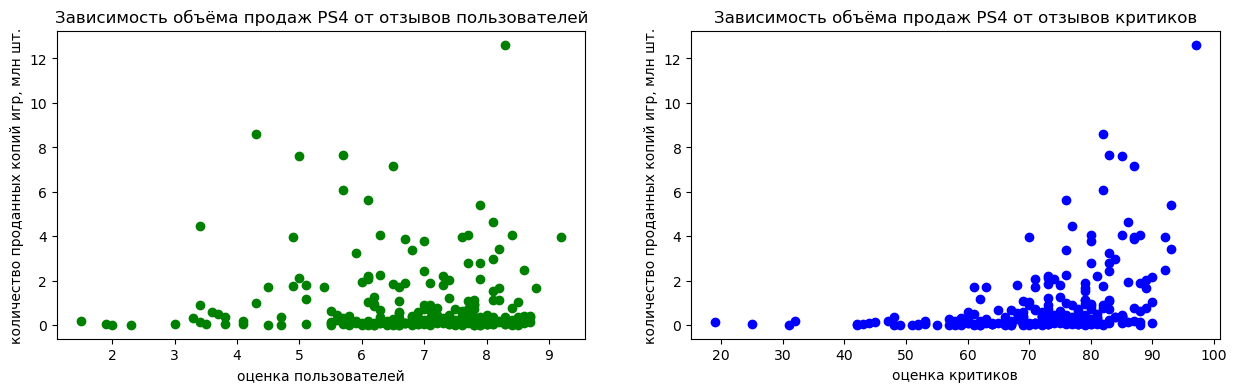

In [42]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
plt.scatter(x=new_data.loc[new_data['platform'] == 'PS4']['user_score'],\
            y=new_data.loc[new_data['platform'] == 'PS4']['total_sales'], color='Green')
plt.title('Зависимость объёма продаж PS4 от отзывов пользователей')
plt.xlabel('оценка пользователей')
plt.ylabel('количество проданных копий игр, млн шт.')

plt.subplot(1, 2, 2)
plt.scatter(x=new_data.loc[(new_data['platform'] == 'PS4')&(new_data['critic_score']!=77777)]['critic_score'],\
            y=new_data.loc[(new_data['platform'] == 'PS4')&(new_data['critic_score']!=77777)]['total_sales'], color='Blue')
plt.title('Зависимость объёма продаж PS4 от отзывов критиков')
plt.xlabel('оценка критиков')
plt.ylabel('количество проданных копий игр, млн шт.')

plt.show()

Как видно из диаграммы рассеяния, **оценки как пользователей, так и критиков слабо влияют на объёмы продаж игр**. Так, **количество проданных копий игр практически не изменяются с повышением уровня оценки**.

Теперь рассчитаем **корреляцию (коэффициент Пирсона)**.

In [43]:
print('Корреляция между объёмами продаж игр для PS4 и оценками пользователей', \
      round(new_data.loc[new_data['platform'] == 'PS4']['user_score'].\
            corr(new_data.loc[new_data['platform'] == 'PS4']['total_sales']), 2))
print('Корреляция между объёмами продаж игр для PS4 и оценками критиков',\
      round(new_data.loc[(new_data['platform'] == 'PS4')&(new_data['critic_score']!=77777)]['critic_score'].\
            corr(new_data.loc[(new_data['platform'] == 'PS4')&(new_data['critic_score']!=77777)]['total_sales']), 2))

Корреляция между объёмами продаж игр для PS4 и оценками пользователей -0.04
Корреляция между объёмами продаж игр для PS4 и оценками критиков 0.4


**Вывод по пункту 3.6**

Таким образом, **корреляция между объёмами продаж игр и оценками пользователей практически отсутствует**, а **между объёмами продаж игр и оценками критиков корреляция слабая**.

#### Соотнесите выводы с продажами игр на других платформах.

Для того, чтобы оценить коррелицию между объёмами продаж игр и оценками пользователей/критиков построим диаграммы рассеяния и вычислим корреляцию для 2 (двух) других потенциально прибыльных платформ XOne и 3DS (выбрали в пункте 3.4).

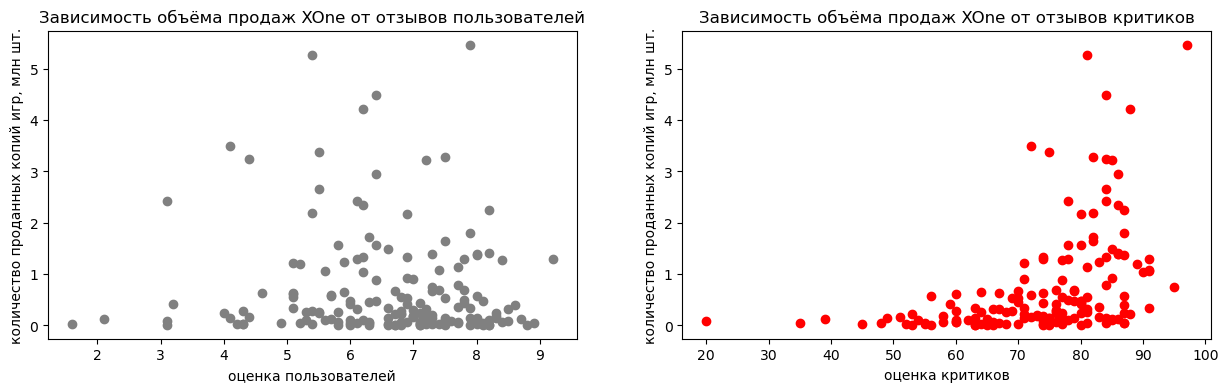

Корреляция между объёмами продаж игр для XOne и оценками пользователей -0.07
Корреляция между объёмами продаж игр для XOne и оценками критиков 0.43


In [44]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
plt.scatter(x=new_data.loc[new_data['platform'] == 'XOne']['user_score'],\
            y=new_data.loc[new_data['platform'] == 'XOne']['total_sales'], color='Grey')
plt.title('Зависимость объёма продаж XOne от отзывов пользователей')
plt.xlabel('оценка пользователей')
plt.ylabel('количество проданных копий игр, млн шт.')

plt.subplot(1, 2, 2)
plt.scatter(x=new_data.loc[(new_data['platform'] == 'XOne')&(new_data['critic_score']!=77777)]['critic_score'],\
            y=new_data.loc[(new_data['platform'] == 'XOne')&(new_data['critic_score']!=77777)]['total_sales'], color='Red')
plt.title('Зависимость объёма продаж XOne от отзывов критиков')
plt.xlabel('оценка критиков')
plt.ylabel('количество проданных копий игр, млн шт.')

plt.show()

print('Корреляция между объёмами продаж игр для XOne и оценками пользователей', \
      round(new_data.loc[new_data['platform'] == 'XOne']['user_score'].\
            corr(new_data.loc[new_data['platform'] == 'XOne']['total_sales']), 2))
print('Корреляция между объёмами продаж игр для XOne и оценками критиков',\
      round(new_data.loc[(new_data['platform'] == 'XOne')&(new_data['critic_score']!=77777)]['critic_score'].\
            corr(new_data.loc[(new_data['platform'] == 'XOne')&(new_data['critic_score']!=77777)]['total_sales']), 2))

Как видно из графиков и расчёта **корреляции для платформы XOne аналогично такой же корреляции для платформы PS4**:
- корреляция между объёмами продаж игр и оценками пользователей практически отсутствует;
- корреляция между объёмами продаж игр и оценками критиков слабая.

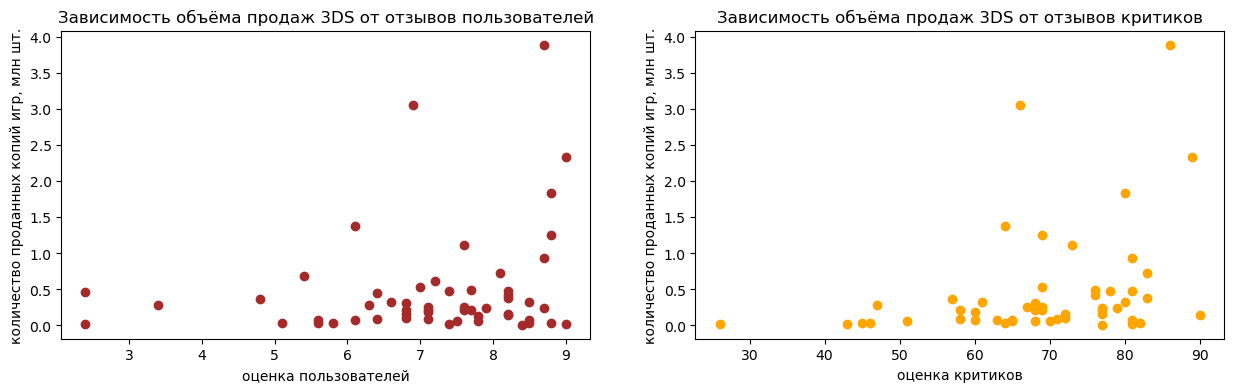

Корреляция между объёмами продаж игр для 3DS и оценками пользователей 0.22
Корреляция между объёмами продаж игр для 3DS и оценками критиков 0.31


In [45]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
plt.scatter(x=new_data.loc[new_data['platform'] == '3DS']['user_score'],\
            y=new_data.loc[new_data['platform'] == '3DS']['total_sales'], color='Brown')
plt.title('Зависимость объёма продаж 3DS от отзывов пользователей')
plt.xlabel('оценка пользователей')
plt.ylabel('количество проданных копий игр, млн шт.')

plt.subplot(1, 2, 2)
plt.scatter(x=new_data.loc[(new_data['platform'] == '3DS')&(new_data['critic_score']!=77777)]['critic_score'],\
            y=new_data.loc[(new_data['platform'] == '3DS')&(new_data['critic_score']!=77777)]['total_sales'], color='Orange')
plt.title('Зависимость объёма продаж 3DS от отзывов критиков')
plt.xlabel('оценка критиков')
plt.ylabel('количество проданных копий игр, млн шт.')

plt.show()

print('Корреляция между объёмами продаж игр для 3DS и оценками пользователей', \
      round(new_data.loc[new_data['platform'] == '3DS']['user_score'].\
            corr(new_data.loc[new_data['platform'] == '3DS']['total_sales']), 2))
print('Корреляция между объёмами продаж игр для 3DS и оценками критиков',\
      round(new_data.loc[(new_data['platform'] == '3DS')&(new_data['critic_score']!=77777)]['critic_score'].\
            corr(new_data.loc[(new_data['platform'] == '3DS')&(new_data['critic_score']!=77777)]['total_sales']), 2))

Как видно из графиков и расчёта **корреляции для платформы 3DS**:
- корреляция между объёмами продаж игр и оценками пользователей очень слабая (у двух других популярных платформ PS4 и XOne такая корреляция отсутствует);
- корреляция между объёмами продаж игр и оценками критиков слабая.

Сформируем таблицу корреляций для других платформ.

In [46]:
list_platform = new_data['platform'].unique()

user_corr = []
critic_corr = []
for p in list_platform:
    user_corr.append(new_data.loc[new_data['platform'] == p]['user_score'].\
    corr(new_data.loc[new_data['platform'] == p]['total_sales']))
    
    critic_corr.append(new_data.loc[(new_data['platform'] == p)&(new_data['critic_score']!=77777)]['critic_score'].\
    corr(new_data.loc[(new_data['platform'] == p)&(new_data['critic_score']!=77777)]['total_sales']))

data_score = pd.DataFrame({'user_corr':user_corr,
                           'critic_corr':critic_corr,},
                          index=list_platform,
                          columns=['user_corr', 'critic_corr'])

data_score['user_corr'] = data_score['user_corr'].round(2)
data_score['critic_corr'] = data_score['critic_corr'].round(2)

def category_corr(column):
    '''Функция присваивает уровень корреляции'''
    if abs(column) <=0.3:
        return 'очень слабая'
    elif (abs(column) >0.3)&(abs(column) <= 0.5):
        return 'слабая'        
    elif (abs(column) >0.5)&(abs(column) <= 0.7):
        return 'средняя' 
    elif (abs(column) >0.7)&(abs(column) <= 0.9):
        return 'высокая'
    elif (abs(column) >0.9)&(abs(column) <= 1):
        return 'очень высокая'
    else:
        return 'не определена'
    
data_score['user_corr_type'] = data_score['user_corr'].apply(category_corr)
data_score['critic_corr_type'] = data_score['critic_corr'].apply(category_corr)

data_score.columns = ['Корреляция продажи-оценки пользователей', 'Корреляция продажи-оценки критиков',\
                     'Тип корреляции продажи-оценки пользователей', 'Тип корреляции продажи-оценки критиков']

data_score.index.names = ['Платформа']

data_score

,Корреляция продажи-оценки пользователей,Корреляция продажи-оценки критиков,Тип корреляции продажи-оценки пользователей,Тип корреляции продажи-оценки критиков
Платформа,,,,
PS4,-0.04,0.40,очень слабая,слабая
3DS,0.22,0.31,очень слабая,слабая
XOne,-0.07,0.43,очень слабая,слабая
WiiU,0.41,0.37,слабая,слабая
PS3,-0.17,0.45,очень слабая,слабая
X360,-0.14,0.53,очень слабая,средняя
PC,-0.07,0.17,очень слабая,очень слабая
Wii,1.00,NaN,очень высокая,не определена
PSV,-0.17,0.04,очень слабая,очень слабая


Как видно из получившейся таблицы, **практически у всех платформ корреляции между объёмами продаж и оценками пользователей/критиков очень слабые или слабые**, как и у 3 (трёх) лидирующих платформ (PS4, XOne, 3DS). Только **у платформы Wii корреляция между оценкой пользователей и объёмам продаж очень высокая**. Выведем строки датасета с данными по этой платформе.

In [47]:
new_data.loc[new_data['platform'] == 'Wii']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,type_years
850,Just Dance 2015,Wii,2014,Misc,0.99,0.85,0.0,0.17,77777,8.4,E10+,2.01,2010-2016
2179,Just Dance 2016,Wii,2015,Misc,0.41,0.46,0.0,0.08,77777,NaN,E10+,0.95,2010-2016
2180,Skylanders: Trap Team,Wii,2014,Action,0.41,0.46,0.0,0.08,77777,NaN,E10+,0.95,2010-2016
3611,FIFA 15,Wii,2014,Sports,0.15,0.37,0.0,0.04,77777,4.3,E,0.56,2010-2016
7991,How to Train Your Dragon 2,Wii,2014,Adventure,0.04,0.13,0.0,0.01,77777,NaN,E10+,0.18,2010-2016
8009,Just Dance 2017,Wii,2016,Misc,0.06,0.11,0.0,0.01,77777,NaN,E10+,0.18,2010-2016
8941,Skylanders: SuperChargers,Wii,2015,Action,0.02,0.12,0.0,0.01,77777,NaN,indefinite,0.15,2010-2016
13570,Disney Planes Fire & Rescue,Wii,2014,Action,0.00,0.04,0.0,0.00,77777,NaN,indefinite,0.04,2010-2016
14682,Barbie and Her Sisters Puppy Rescue,Wii,2015,Action,0.00,0.03,0.0,0.00,77777,NaN,E,0.03,2010-2016
16144,Penguins of Madagascar,Wii,2014,Action,0.00,0.01,0.0,0.00,77777,NaN,E,0.01,2010-2016


In [48]:
new_data.loc[new_data['platform'] == 'Wii'].shape[0]

11

Как видно из датасета **у платформы Wii всего 2 (две) оценки пользователей из 11 (одиннадцати) игр**, а также **высокие продажи по игре "Just Dance 2015" (6-й выпуск очень популярной танцевальной игры)**. Следовательно, **выборка по платформе Wii** в целях расчёта корреляции и, как следствие, установление зависимости **не является репрезентативной**.

**Вывод по пункту 3.7**

По результатам построения диаграмм рассеяния и расчёта корреляции для 2 (двух) других популярных платформ (**XOne и 3DS**) установлено, что:
- **корреляция между объёмами продаж игр и оценками критиков слабая, как у платформы PS4**;
- **корреляция между объёмами продаж игр и оценками пользователей** у платформы **XOne**, как **и** у платформы **PS4** практически **отсутствует**, а у платформы **3DS** - **очень слабая**.

Рассчитанные **значения корреляций по другим платформам** также **показали** либо **отсутствие**, либо **очень слабую связь между объёмами продаж игр и оценками пользователей/критиков**.

#### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Сначала построим сводную таблицу.

In [49]:
genre_table = new_data.pivot_table(index='genre',
                 values='total_sales',                                  
                 aggfunc=['count', 'sum', 'mean', 'median'])

genre_table.columns = ['Количество продаж', 'Сумма продаж', 'Среднее значение продаж', 'Медиана продаж']

genre_table.index.names = ['Жанр']
    
genre_table['Количество продаж'] =  \
genre_table['Количество продаж'].round(0).astype(str)
genre_table['Сумма продаж'] =  \
genre_table['Сумма продаж'].round(2).astype(str)
genre_table['Среднее значение продаж'] =  \
genre_table['Среднее значение продаж'].round(2).astype(str)
genre_table['Медиана продаж'] =  \
genre_table['Медиана продаж'].round(2).astype(str)

genre_table

,Количество продаж,Сумма продаж,Среднее значение продаж,Медиана продаж
Жанр,,,,
Action,619,199.36,0.32,0.09
Adventure,185,17.55,0.09,0.03
Fighting,60,28.22,0.47,0.12
Misc,113,37.55,0.33,0.09
Platform,38,18.09,0.48,0.14
Puzzle,14,2.21,0.16,0.04
Racing,69,27.52,0.4,0.09
Role-Playing,221,101.44,0.46,0.11
Shooter,128,170.94,1.34,0.52


Для наглядности **построим графики**. Возьмём такие статистики, как количество (ассортимент игр), объёмы продаж (количество копий игр), мода и медиана продаж.

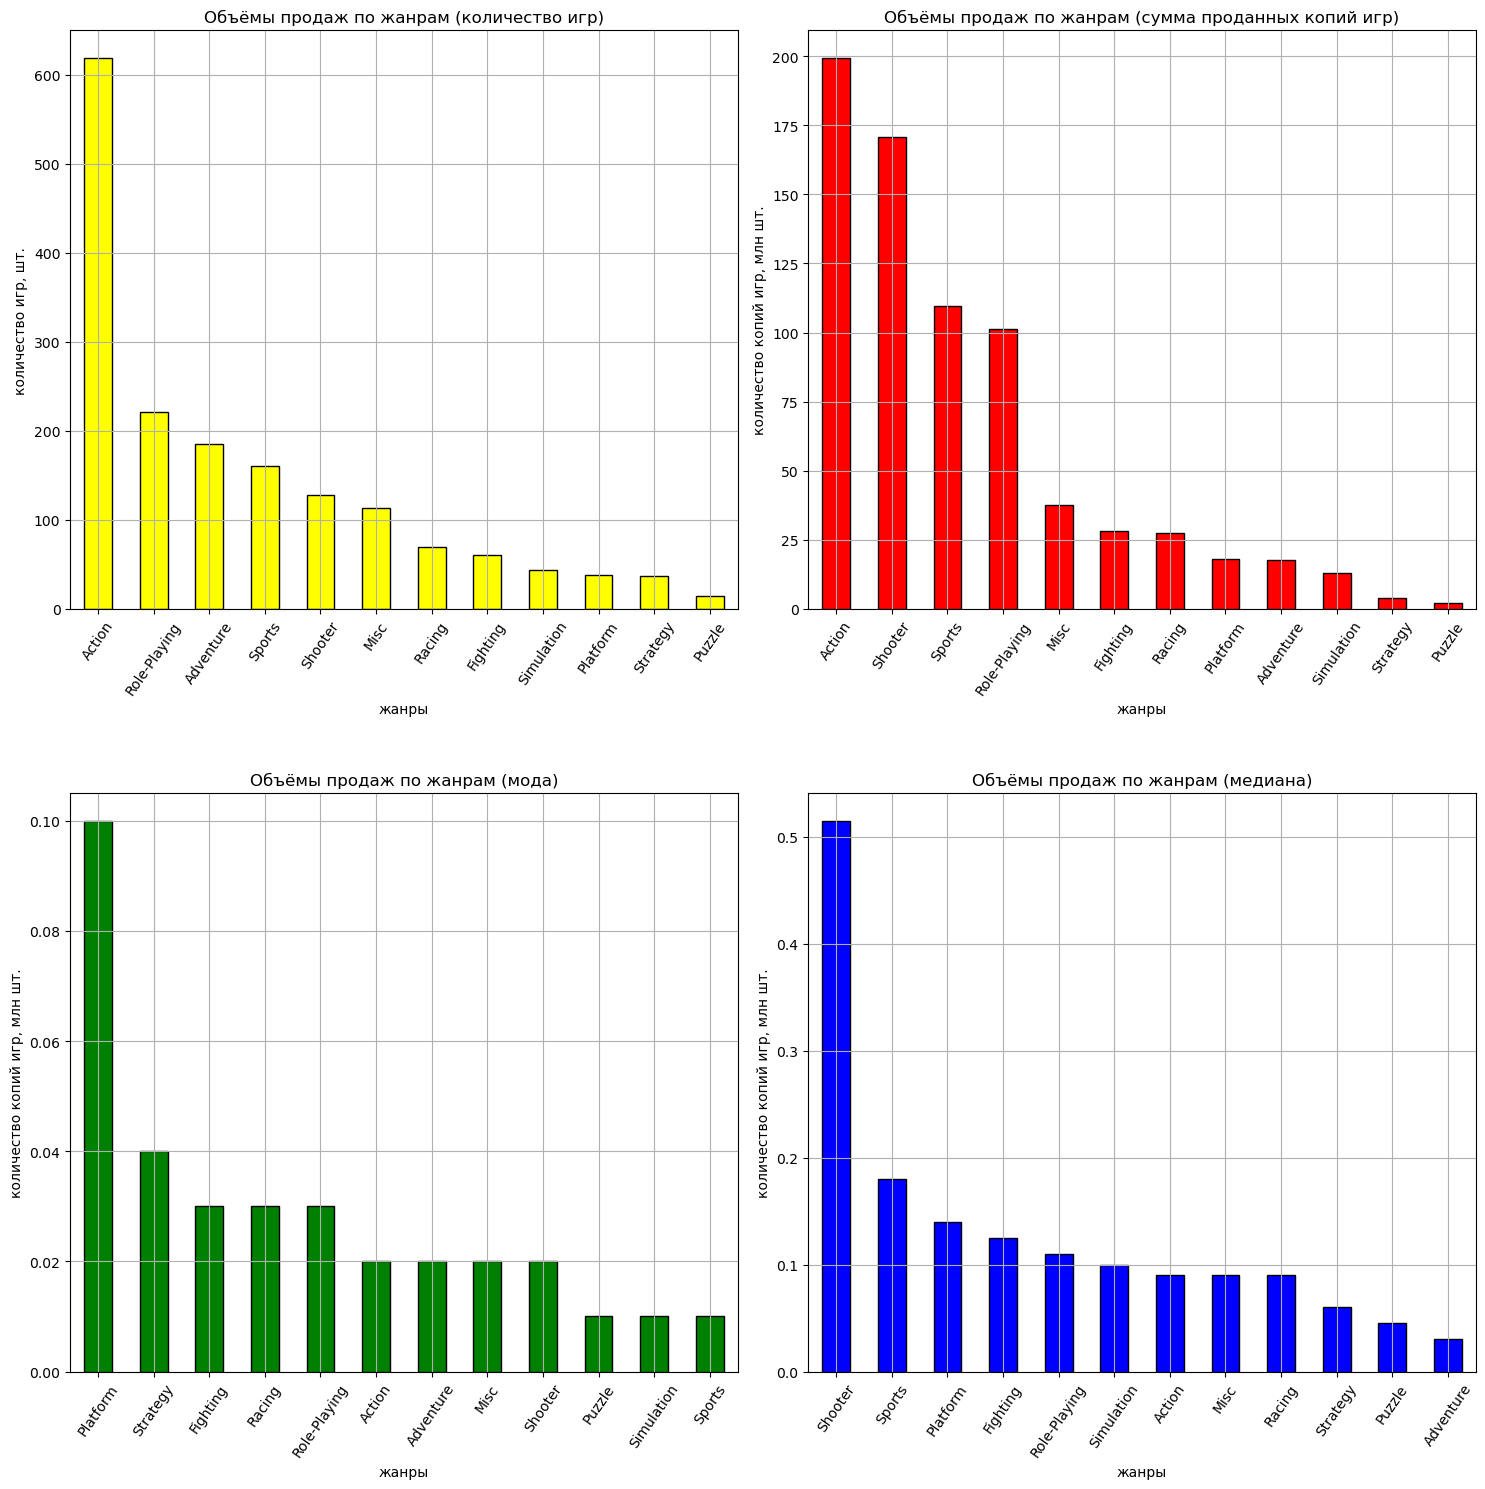

In [50]:
plt.subplot(2, 2, 1)

new_data.groupby('genre')['total_sales'].agg('count').sort_values(ascending=False).plot(kind='bar', \
                                                                          figsize=(15, 15), color='yellow',\
                                                                          grid=True, edgecolor='k')
plt.title('Объёмы продаж по жанрам (количество игр)')
plt.ylabel('количество игр, шт.')
plt.xlabel('жанры')
plt.xticks(rotation=55)

plt.subplot(2, 2, 2)
new_data.groupby('genre')['total_sales'].agg('sum').sort_values(ascending=False).plot(kind='bar', \
                                                                          figsize=(15, 15), color='red',\
                                                                          grid=True, edgecolor='k')
plt.title('Объёмы продаж по жанрам (сумма проданных копий игр)')
plt.ylabel('количество копий игр, млн шт.')
plt.xlabel('жанры')
plt.xticks(rotation=55)

plt.subplot(2, 2, 3)
new_data.groupby('genre')['total_sales'].agg(stat.mode).sort_values(ascending=False).plot(kind='bar', \
                                                                          figsize=(15, 15), color='green',\
                                                                          grid=True, edgecolor='k')
plt.title('Объёмы продаж по жанрам (мода)')
plt.ylabel('количество копий игр, млн шт.')
plt.xlabel('жанры')
plt.xticks(rotation=55)

plt.subplot(2, 2, 4)
new_data.groupby('genre')['total_sales'].agg('median').sort_values(ascending=False).plot(kind='bar', \
                                                                          figsize=(15, 15), color='blue',\
                                                                          grid=True, edgecolor='k')
plt.title('Объёмы продаж по жанрам (медиана)')
plt.ylabel('количество копий игр, млн шт.')
plt.xlabel('жанры')
plt.xticks(rotation=55)

plt.tight_layout(h_pad= 4)
plt.show()

**Самыми прибыльными жанрами** (второй график в первом ряду) (**объёмы продаж свыше 100 (ста) млн копий игр**) являются:

**- Action**(экшен, жанр компьютерных игр, в котором делается упор на эксплуатацию физических возможностей игрока, в том числе координации глаз и рук и скорости реакции) - 200 млн копий игр;

**- Shooter** (жанр компьютерных игр, «шутер», как вариант описания игрового процесса и перевод для слова shooter (стрелять)) - чуть меньше 175 млн копий игр;

**- Sports** (спортивный симулятор — видеоигра, которая имитирует занятия спортом) - приблизительно 110 млн копий игр;

**- Role-Playing** (жанр компьютерных игр, основанный на элементах игрового процесса традиционных настольных ролевых игр) -  чуть болье 100 млн копий игр.

У остальных жанров продано менее 40 млн копий игр.

**Самые маленькие продажи у** таких **жанров**, как: 

**- Strategy** (жанр компьютерных игр, в котором игроку для победы необходимо применять стратегическое мышление, игроку предлагается играть не за конкретного персонажа, а за их условные массы, к примеру, руководить строительством города или командовать целыми армиями в военных кампаниях) - около 10 млн копий игр;  

**- Puzzle** (жанр компьютерных игр, целью которых является решение логических задач, требующих от игрока задействования логики, стратегии и интуиции) - менее 10 млн копий игр.

При этом, по количеству проданных игр (**разнообразие ассортимента**) **абсолютным лидером выступает Action** (более 600 разных игр), у следующего за ним **Role-Playing** ассортимент игр составляет чуть более 200 игр. У **Shooter** - приблизительно 120 игр, у **Sports** - около 170 игр.

У аутсайдеров по объёмам продаж **Strategy** и **Puzzle** ассортимент игр составляет менее 40 игр.

Теперь посмотрим на значение медианы продаж игр. Здесь абсолютным лидером является **Shooter** (более 0.5 млн копий игр), а у лидера по объёмам продаж, **Action**, значение медианы составляет 0.09 млн копий игр. При этом, значение моды у данных 2 (двух) жанров равно - 0.02 млн копий игр. Следовательно, скорее всего, у жанра **Action** самые высокие объёмы продаж за счёт самого большого ассортимента игр, а игры жанра **Shooter** (ассортимент игр примерно в 6 (шесть) раз ниже, чем у Action, при этом объёмы продаж ниже примерно на 14%) продаются лучше (значение медианы приблизительно в 5 (пять) раз выше, чем у Action).

Что касается игр жанров **Sports** и **Role-Playing**. Значение медианы у **Sports** примерно 0.17 млн копий, что на 70% больше значения медианы у **Role-Playing** - 0.1 млн копий. При этом, значение моды у **Role-Playing** приблизительно в 3 раза выше, чем у **Sports**. Следовательно, учитывая, что ассортимент игр у **Role-Playing** больше, чем у **Sports** на 25%, получаем, что игры жанра **Sports** в целом продаются немного лучше, чем у **Role-Playing**.

**Вывод по пункту 3.8**

Таким образом, самыми прибыльными жанрами являются **Action, Shooter, Sports, Role-Playing**. При этом, у жанра **Action самые высокие объёмы продаж за счёт самого большого ассортимента игр**, а **игры жанра Shooter** (ассортимент игр примерно в 6 (шесть) раз ниже, чем у Action, при этом объёмы продаж ниже примерно на 14%) **продаются лучше** (значение медианы приблизительно в 5 (пять) раз выше, **чем у Action**).

Также, учитывая, что ассортимент игр у Role-Playing больше, чем у Sports на 25%, получаем, что **игры жанра Sports в целом продаются немного лучше, чем у Role-Playing**.

**Низкие объёмы продаж Strategy и Puzzle обусловлены небольшим ассортимент игр** (менее 50 игр каждого жанра).

**Вывод по пункту 3**

1. Исходя из проведённого анализа данных, **для проведения дальнейшего исследования важны данные за период с 2005 по 2006 годы**.

2. **Характерный срок**, в течение которого **появляются новые и исчезают старые платформы**, составляет **10 (десять) лет**.

3. Для целей настоящего исследования (прогноз на 2017 год) **возьмём 3-х (трёх) летний период с 2014 по 2016 годы**.

4. По результатам анализа как **потенциально прибыльные платформы выбраны 3 (три): PS4, XOne, 3DS**. Продажи игр платформ PS4 и XOne в 2015 выросли по сравнению с 2014 годом, в то время, как продажи 3DS, наоборот, снизились.  
  
  Что касается 2016 года, то продажи всех трёх платформ показали снижение, причина которого в том, что за 2016 год в датасете отсутствуют полные данные.

5. 5.1. В отношении выбросов:
- наибольшее количество выбросов у платформ PS4, XOne, 3DS;
- меньше всего выбросов у платформы PSP.  
  5.2. В отношении медианы:
- самые большие значения у платформ: XOne, WiiU, Wii, X360 и PS4;
- самая низкие - PSP, PSV.  
  5.3. В отношении первого квартиля (25%):
- самые большие значения у платформ: X360, PS4, Wii, XOne;
- самая низкие - PSP, PSV, PS.  
  5.4.  В отношении третьего квартиля (75%):
- самые большие значения у платформы Wii;
- самая низкие - PSP, PSV.

6. **Корреляция между объёмами продаж игр и оценками пользователей практически отсутствует**, а **между объёмами продаж игр и оценками критиков корреляция слабая**.

7. **Рассчитанные значения корреляций по другим платформам также показали либо отсутствие, либо очень слабую связь между объёмами продаж игр и оценками пользователей/критиков**.

8. **Самыми прибыльными жанрами являются Action, Shooter, Sports, Role-Playing**. При этом, **у жанра Action самые высокие объёмы продаж за счёт самого большого ассортимента игр, а игры жанра Shooter продаются лучше, чем у Action**.  

   Учитывая, что ассортимент игр у Role-Playing больше, чем у Sports, получаем, что **игры жанра Sports в целом продаются немного лучше, чем у Role-Playing**.  

  **Низкие объёмы продаж Strategy и Puzzle обусловлены небольшим ассортимент игр** (менее 40 игр каждого жанра).

### Составим портрет пользователя каждого региона

#### Сначала определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5). 

Построим **круговые диаграммы, где в отдельную долю поместим платформы, не вошедшие в топ-5**.

In [51]:
#сначала подготовим таблицы для каждого региона в отдельности
#таблица для Северной Америки
platform_na = new_data.pivot_table(index='platform', values='na_sales', aggfunc='sum')\
.sort_values(by='na_sales',ascending=False).reset_index()

top_5_platform_na = platform_na.iloc[:5]

other = pd.DataFrame(platform_na.reset_index()[platform_na.reset_index().index > 4]['na_sales'].sum(),\
                     index=['Other'], columns=['na_sales'])
top_all_platform_na = pd.concat([top_5_platform_na, other])
top_all_platform_na['platform'] = top_all_platform_na['platform'].fillna('others')

#таблица для Европы
platform_eu = new_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum')\
.sort_values(by='eu_sales',ascending=False).reset_index()

top_5_platform_eu = platform_eu.iloc[:5]

other = pd.DataFrame(platform_eu.reset_index()[platform_eu.reset_index().index > 4]['eu_sales'].sum(),\
                     index=['Other'], columns=['eu_sales'])
top_all_platform_eu = pd.concat([top_5_platform_eu, other])
top_all_platform_eu['platform'] = top_all_platform_eu['platform'].fillna('others')

#таблица для Японии
platform_jp = new_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum')\
.sort_values(by='jp_sales',ascending=False).reset_index()

top_5_platform_jp = platform_jp.iloc[:5]

other = pd.DataFrame(platform_jp.reset_index()[platform_jp.reset_index().index > 4]['jp_sales'].sum(),\
                     index=['Other'], columns=['jp_sales'])
top_all_platform_jp = pd.concat([top_5_platform_jp, other])
top_all_platform_jp['platform'] = top_all_platform_jp['platform'].fillna('others')

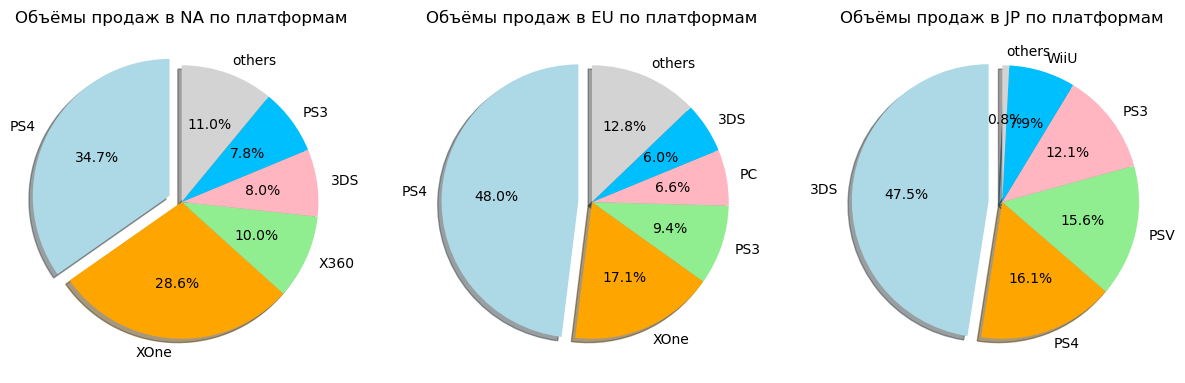

In [52]:
#на основании получившихся таблиц построим круговые диаграммы
fig = plt.figure(figsize = (15, 8))

plt.subplot(1, 3, 1)
plt.pie(top_all_platform_na['na_sales'], labels=top_all_platform_na['platform'], startangle=90, explode=[0.1,0,0,0,0,0],
       shadow=True, autopct='%2.1f%%', colors=['lightblue', 'orange', 'lightgreen', 'lightpink', 'deepskyblue',\
                                               'lightgrey'])
plt.title('Объёмы продаж в NA по платформам')



plt.subplot(1, 3, 2)
plt.pie(top_all_platform_eu['eu_sales'], labels=top_all_platform_eu['platform'], startangle=90, explode=[0.1,0,0,0,0,0],
       shadow=True, autopct='%2.1f%%', colors=['lightblue', 'orange', 'lightgreen', 'lightpink', 'deepskyblue',\
                                               'lightgrey'])
plt.title('Объёмы продаж в EU по платформам')

plt.subplot(1, 3, 3)
plt.pie(top_all_platform_jp['jp_sales'], labels=top_all_platform_jp['platform'], startangle=90, explode=[0.1,0,0,0,0,0],
       shadow=True, autopct='%2.1f%%', colors=['lightblue', 'orange', 'lightgreen', 'lightpink', 'deepskyblue',\
                                               'lightgrey'])
plt.title('Объёмы продаж в JP по платформам')

plt.show()

Как видно на круговых диаграммах:

- **в Северной Америке, как и в Европе самой популярной платформой является PS4**, причём, если **объёмы продаж в Европе у этой платформы занимают практически половину от всех продаж** (48%), то **в Северной Америке наибольшее число продаж (более 60%) приходятся практически поровну на 2 (две) платформы: PS4 (35%) и XOne (29%)**;

- **в Японии почти половина продаж приходится на 3DS (48%)**, в то время, как продажи данной платформы в Северной Америке и Европе не превышают 8 (восьми) процентов, популярная в других регионах PS4, в Японии занимает второе место (16%), а XOne в топе-5 платформ, вообще, отсутствует;

- **платформа X360 в топе-5 представлена только в Северной Америке**;

- **платформа PS3 во всех 3 (трёх) регионах занимает от 8 до 12% от общих объёмов продаж**;

- **только в Европе платформа PC (станционарный компьютер/ноутбук) входит в топ-5 платформ**, занимая менее 7% от общего объёма продаж;

- **только в Японии в топ-5 входят PSV (менее 16%) и WiiU (менее 8%)**, не представленная в Северной Америке и Европе.

**Вывод по пункту 4.1**

1. **В Северной Америке, как и в Европе самой популярной платформой является PS4**, в Японии данная платформа занимает только 2 (второе) место.  

2. **В Северной Америке почти одну треть занимает платформа XOne**, в Европе - только пятую часть, в Японии - вообще, не входит в топ-5.  

3. **В Японии почти половина продаж приходится на 3DS (48%)**, в то время, как продажи данной платформы в Северной Америке и Европе не превышают десятой части.  

4. **Платформа X360 в топе-5 представлена только в Северной Америке**.  

5. **Платформа PS3 во всех 3 (трёх) регионах занимает примерно пятую часть от общих объёмов продаж**.  

6. **Только в Европе платформа PC (станционарный компьютер/ноутбук) входит в топ-5 платформ**.  

7. **Только в Японии в топ-5 входят PSV чуть более десятой части и WiiU (менее десятой части)**, не представленные в Северной Америке и Европе.

Стоит отметить, что **топы-5 платформ Северной Америки и Европы имеют больше общих характеристик между собой, чем с топом-5 Японии** (другая самая популярная платформа (3DS), одна из самых популярных платформ в Северной Америке и в Европе (XOne) отсутствует в топе-5 Японии, только в этом регионе представлена платформа WiiU).

#### Сначала определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5). 

Построим **круговые диаграммы, где в отдельную долю поместим жанры, не вошедшие в топ-5**.

In [53]:
#сначала подготовим таблицы для каждого региона в отдельности
#таблица для Северной Америки
genre_na = new_data.pivot_table(index='genre', values='na_sales', aggfunc='sum')\
.sort_values(by='na_sales',ascending=False).reset_index()

top_5_genre_na = genre_na.iloc[:5]

other = pd.DataFrame(genre_na.reset_index()[genre_na.reset_index().index > 4]['na_sales'].sum(),\
                     index=['Other'], columns=['na_sales'])
top_all_genre_na = pd.concat([top_5_genre_na, other])
top_all_genre_na['genre'] = top_all_genre_na['genre'].fillna('others')

#таблица для Европы
genre_eu = new_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum')\
.sort_values(by='eu_sales',ascending=False).reset_index()

top_5_genre_eu = genre_eu.iloc[:5]

other = pd.DataFrame(genre_eu.reset_index()[genre_eu.reset_index().index > 4]['eu_sales'].sum(),\
                     index=['Other'], columns=['eu_sales'])
top_all_genre_eu = pd.concat([top_5_genre_eu, other])
top_all_genre_eu['genre'] = top_all_genre_eu['genre'].fillna('others')

#таблица для Японии
genre_jp = new_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum')\
.sort_values(by='jp_sales',ascending=False).reset_index()

top_5_genre_jp = genre_jp.iloc[:5]

other = pd.DataFrame(genre_jp.reset_index()[genre_jp.reset_index().index > 4]['jp_sales'].sum(),\
                     index=['Other'], columns=['jp_sales'])
top_all_genre_jp = pd.concat([top_5_genre_jp, other])
top_all_genre_jp['genre'] = top_all_genre_jp['genre'].fillna('others')

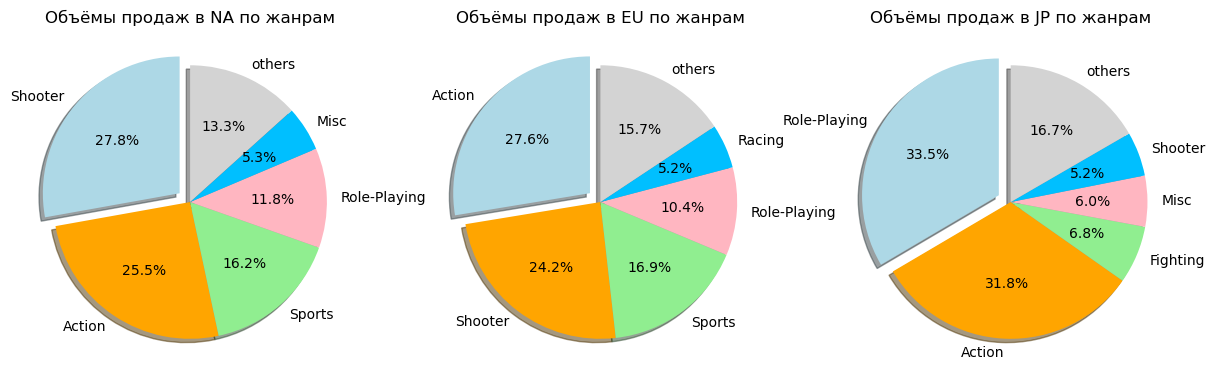

In [54]:
#на основании получившихся таблиц построим круговые диаграммы
fig = plt.figure(figsize = (15, 8))

plt.subplot(1, 3, 1)
plt.pie(top_all_genre_na['na_sales'], labels=top_all_genre_na['genre'], startangle=90, explode=[0.1,0,0,0,0,0],
       shadow=True, autopct='%2.1f%%', colors=['lightblue', 'orange', 'lightgreen', 'lightpink', 'deepskyblue',\
                                               'lightgrey'])
plt.title('Объёмы продаж в NA по жанрам')



plt.subplot(1, 3, 2)
plt.pie(top_all_genre_eu['eu_sales'], labels=top_all_genre_eu['genre'], startangle=90, explode=[0.1,0,0,0,0,0],
       shadow=True, autopct='%2.1f%%', colors=['lightblue', 'orange', 'lightgreen', 'lightpink', 'deepskyblue',\
                                               'lightgrey'])
plt.title('Объёмы продаж в EU по жанрам')

plt.subplot(1, 3, 3)
plt.pie(top_all_genre_jp['jp_sales'], labels=top_all_genre_jp['genre'], startangle=90, explode=[0.1,0,0,0,0,0],
       shadow=True, autopct='%2.1f%%', colors=['lightblue', 'orange', 'lightgreen', 'lightpink', 'deepskyblue',\
                                               'lightgrey'])
plt.title('Объёмы продаж в JP по жанрам')

plt.show()

Как видно на круговых диаграммах:
- **в Северной Америке, как и в Европе 2 (два) самых популярных жанра Shooter и Action** (от 24 до 28% от общего объёма продаж по каждому региону);

- при этом, **в Японии также 2 (два) популярных жанра: как и в других регионах Action** (почти 32%), а вот **первое место занимает Role-Playing (более 33%)**, популярный в Северной Америке и Европе Shooter занимает только 5%;

- **самый популярный в Японии жанр Role-Playing** в других регионах занимает от 10 до 12%;

- **жанр Sports занимает практически одинаковые доли в Северной Америке и в Европе** (от 16 до 17%), а **в Японии в топе-5**, вообще, **отсутствует**;

- **жанр Misc представлен в Северной Америке (5%) и в Японии (6%)**, при этом **в Европе** в топе-5 данный жанр **отсутствует**;

- **жанр Racing представлен только в Европе** (5%);

- **жанр Fighting представлен только в Японии** (7%).1

**вывод по пункту 4.2**

Таким образом, **есть жанры игр, представленные в топе-5**:
- **во всех 3 (трёх) регионах (Shooter, Action, Role-Playing)**;
- **только в 2 (двух) регионах (Sports, Misc)**;
- **только в 1 (одном) регионе (Racing, Fighting)**.

Стоит отметить, что **топы-5 жанров Северной Америки и Европы имеют больше общих характеристик между собой, чем с топом-5 Японии** (другой самый популярный жанр (Role-Playing), один из самых популярных жанров в Северной Америке и в Европе (Shooter) занимает только 5 (пять) процентов, только в этом регионе представлен жанр Fighting).

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Построим **круговые диаграммы, где в отдельную долю поместим жанры, не вошедшие в топ-5**.

In [55]:
def category_rating(column):
    """Функция расшифровывает рейтинг ESRB"""
    if column == 'M':
        return 'от 17 лет'
    elif column == 'E':
        return 'для всех'
    elif column == 'T':
        return 'от 13 до 19 лет'
    elif column == 'E10+':
        return 'для всех старше 10 лет'
    elif column == 'indefinite':
        return 'не определён'

new_data['type_rating'] = new_data['rating'].apply(category_rating)

In [56]:
#сначала подготовим таблицы для каждого региона в отдельности
#таблица для Северной Америки
rating_na = new_data.pivot_table(index='type_rating', values='na_sales', aggfunc='sum')\
.sort_values(by='na_sales',ascending=False).reset_index()

#таблица для Европы
rating_eu = new_data.pivot_table(index='type_rating', values='eu_sales', aggfunc='sum')\
.sort_values(by='eu_sales',ascending=False).reset_index()

#таблица для Японии
rating_jp = new_data.pivot_table(index='type_rating', values='jp_sales', aggfunc='sum')\
.sort_values(by='jp_sales',ascending=False).reset_index()

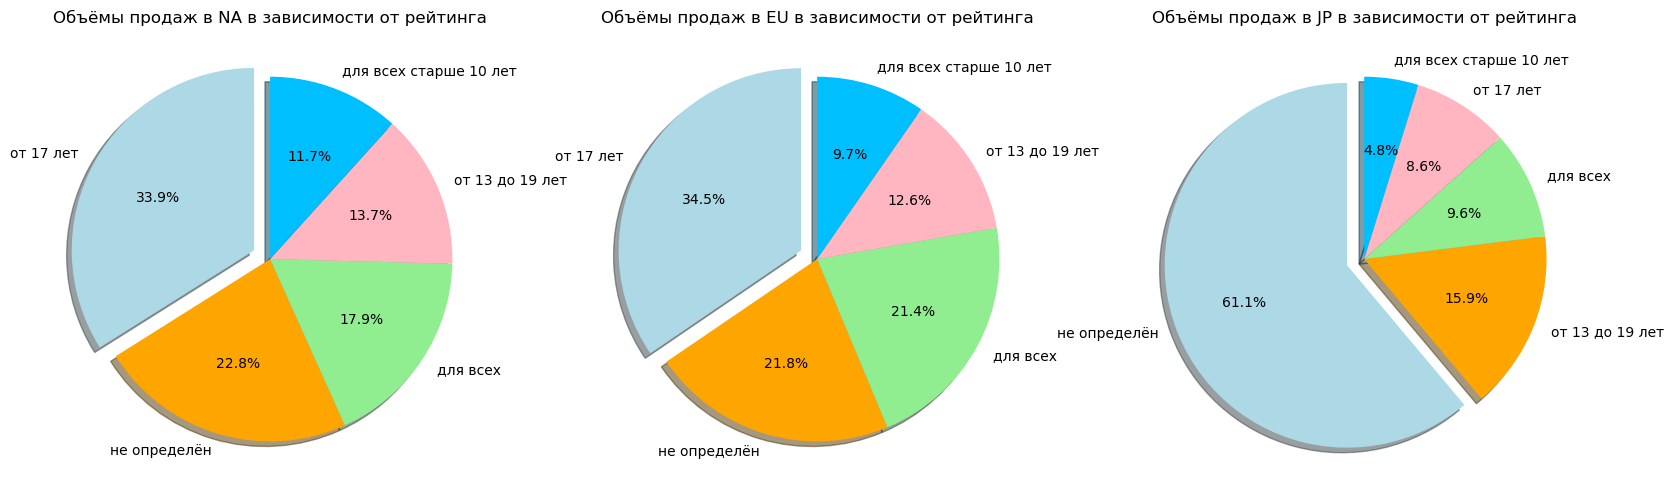

In [57]:
#на основании получившихся таблиц построим круговые диаграммы
fig = plt.figure(figsize = (20, 8))

plt.subplot(1, 3, 1)
plt.pie(rating_na['na_sales'], labels=rating_na['type_rating'], startangle=90, explode=[0.1,0,0,0,0],
       shadow=True, autopct='%2.1f%%', colors=['lightblue', 'orange', 'lightgreen', 'lightpink', 'deepskyblue'])
plt.title('Объёмы продаж в NA в зависимости от рейтинга')

plt.subplot(1, 3, 2)
plt.pie(rating_eu['eu_sales'], labels=rating_eu['type_rating'], startangle=90, explode=[0.1,0,0,0,0],
       shadow=True, autopct='%2.1f%%', colors=['lightblue', 'orange', 'lightgreen', 'lightpink', 'deepskyblue'])
plt.title('Объёмы продаж в EU в зависимости от рейтинга')

plt.subplot(1, 3, 3)
plt.pie(rating_jp['jp_sales'], labels=rating_jp['type_rating'], startangle=90, explode=[0.1,0,0,0,0],
       shadow=True, autopct='%2.1f%%', colors=['lightblue', 'orange', 'lightgreen', 'lightpink', 'deepskyblue'])
plt.title('Объёмы продаж в JP в зависимости от рейтинга')

plt.show()

Исходя из данных, отображённых на круговых диаграммах, **рейтинг не влияет на продажи игр**:

- **в Северной Америке и в Европе чуть менее 35% продаваемых игр с рейтингом "от 17 лет"**, в Японии данный рейтинг занимает почти 9%;

- **во всех 3 (трёх) регионах значительные доли у игр без рейтинга** (в Северной Америке и в Европе - 22-23%, зато в Японии 61%);

- **доля игр "для всех" занимает в Северной Америке и в Европе от 18 до 21%**, в то время, как в Японии, - почти 10%;

- **доля игр "от 13 до 19 лет" занимает в Северной Америке и в Европе от 13 до 14%**, в то время, как в Японии, - почти 16%;

- **доля игр "для всех старше 10 лет" занимает в Северной Америке и в Европе от 10 до 12%**, в то время, как в Японии, - почти 5%.

Стоит отметить, что такое **распределение объёмов продаж игр в зависимости от рейтинга связано с тем, что**, в основном, **потребителями компьютерных игр являются люди старше 17 лет, а также подростки, дети, как правило, играют реже**.

**Аналогично топам-5 по платформам и жанрам** видно, что **между Северной Америкой и Европой много похожих параметров по рейтингам игр**, в то время, как **рейтинг игр в Японии отличается**. Это обусловлено тем, что **ESRB - американская рейтинговые модель**, которая также распространена в Европе, а **в Японии своя модель - CERO**.

**Вывод по пункту 4.3**

**Рейтинг не влияет на продажи игр**, также аналогично топам-5 по платформам и жанрам видно, что **между Северной Америкой и Европой много похожих параметров по рейтингам игр**, в то время, как **рейтинг игр в Японии отличается**. Это обусловлено тем, что **ESRB - американская рейтинговые модель**, которая также распространена в Европе, а **в Японии своя модель - CERO**.

**Вывод по пункту 4**

1. **Топы-5 платформ Северной Америки и Европы имеют больше общих характеристик между собой, чем с топом-5 Японии** (другая самая популярная платформа (3DS), одна из самых популярных платформ в Северной Америке и в Европе (XOne) отсутствует в топе-5 Японии, только в этом регионе представлена платформа WiiU).

2. **Топы-5 жанров Северной Америки и Европы имеют больше общих характеристик между собой, чем с топом-5 Японии** (другой самый популярный жанр (Role-Playing), один из самых популярных жанров в Северной Америке и в Европе (Shooter) занимает только 5 (пять) процентов, только в этом регионе представлен жанр Fighting).

3. **Рейтинг не влияет на продажи игр**, также аналогично топам-5 по платформам и жанрам видно, что **между Северной Америкой и Европой много похожих параметров по рейтингам игр**, в то время, как **рейтинг игр в Японии отличается**. Это обусловлено тем, что **ESRB - американская рейтинговые модель, которая также распространена в Европе**, а **в Японии своя модель - CERO**.

### Проверим гипотезы
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.



Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

  Нулевой гипотезой здесь будет: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые  
  Значит альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC разные

**Так как в рассматриваемом случае имеют место две независимые выборки, то будем применять метод scipy.stats.ttest_ind (array1, array2, equal_var)**.

Сначала подготовим данные, убрав пропуски.

In [58]:
new_data_for_hypothesis_1 = new_data.loc[new_data['platform'] == 'XOne']['user_score'].dropna()
new_data_for_hypothesis_2 = new_data.loc[new_data['platform'] == 'PC']['user_score'].dropna()

alpha = 0.05

results = st.ttest_ind(new_data_for_hypothesis_1, new_data_for_hypothesis_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Таким образом, получаем, что **средние пользовательские рейтинги платформ Xbox One и PC одинаковые**.

Теперь перейдём ко второй гипотезе.

#### Средние пользовательские рейтинги жанров Action и Sports разные

  Нулевой гипотезой здесь будет: Средние пользовательские рейтинги жанров Action и Sports разные  
  Значит альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые

**Так как в рассматриваемом случае имеют место две независимые выборки, то будем применять метод scipy.stats.ttest_ind (array1, array2, equal_var)**.

Сначала подготовим данные, убрав пропуски.

In [59]:
new_data_for_hypothesis_1 = new_data.loc[new_data['genre'] == 'Action']['user_score'].dropna()
new_data_for_hypothesis_2 = new_data.loc[new_data['genre'] == 'Sports']['user_score'].dropna()

alpha = 0.05

results = st.ttest_ind(new_data_for_hypothesis_1, new_data_for_hypothesis_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Таким образом, получаем, что **средние пользовательские рейтинги жанров Action и Sports одинаковые**.

**Альтернативные гипотезы сформулированы таким образом, что оказываются верными, если нулевая гипотеза отвергается.** 

**Вывод по пункту 5**
1. **Гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" не отвергнута** (значит средние оценки пользователей жанров платформ Xbox One и PC одинаковые).

2. **Гипотеза "Средние пользовательские рейтинги жанров Action и Sports разные" отвергнута** (значит средние оценки пользователей жанров Action и Sports одинаковые).

3. **Альтернативные гипотезы сформулированы таким образом, что оказываются верными, если нулевая гипотеза отвергается.**

4. Так как **в рассматриваемых случаях имеют место две независимые выборки**, то будем **применять метод scipy.stats.ttest_ind** (array1, array2, equal_var).

### Общий вывод

1. Перед исследовательским анализом данных **проведена** их **предобработка** (1,6% строк от общего массива данных удалены, изменены типы данных в отдельных столбцах).

2. Для целей настоящего исследования (прогноз на 2017 год) **взят 3-х (трёх) летний период с 2014 по 2016 годы**.

3. **Самыми популярными платформами определены PS4 и XOne**, также эти платформы показывают рост продаж в актуальном периоде.

4. **Корреляция между объёмами продаж игр и оценками пользователей практически отсутствует**, а **между объёмами продаж игр и оценками критиков корреляция слабая**.

5.**Самыми прибыльными жанрами являются Action, Shooter, Sports, Role-Playing**. При этом, **у жанра Action самые высокие объёмы продаж за счёт самого большого ассортимента игр**, а **игры жанра Shooter продаются лучше, чем у Action**. Также **игры жанра Sports** в целом **продаются немного лучше, чем у Role-Playing** (учитывая, что ассортимент игр у Role-Playing больше, чем у Sports). **Низкие объёмы продаж Strategy и Puzzle обусловлены небольшим ассортимент игр**.

6. **Топы-5 платформ Северной Америки и Европы имеют больше общих характеристик между собой, чем с топом-5 Японии** (другая самая популярная платформа (3DS), одна из самых популярных платформ в Северной Америке и в Европе (XOne) отсутствует в топе-5 Японии, только в этом регионе представлена платформа WiiU).

7. **Топы-5 жанров Северной Америки и Европы имеют больше общих характеристик между собой, чем с топом-5 Японии** (другой самый популярный жанр (Role-Playing), один из самых популярных жанров в Северной Америке и в Европе (Shooter) занимает только 5 (пять) процентов, только в этом регионе представлен жанр Fighting).

8. **Рейтинг не влияет на продажи игр, также аналогично топам-5 по платформам и жанрам видно, что между Северной Америкой и Европой много похожих параметров по рейтингам игр, в то время, как рейтинг игр в Японии отличается**. Это обусловлено тем, что ESRB - американская рейтинговые модель, которая также распространена в Европе, а в Японии своя модель - CERO.

9.**Гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" не отвергнута** (значит средние оценки пользователей жанров платформ Xbox One и PC одинаковые).

10. **Гипотеза "Средние пользовательские рейтинги жанров Action и Sports разные" отвергнута** (значит средние оценки пользователей жанров Action и Sports одинаковые).